In [1]:
from tsfresh_script import *

In [2]:
meta_df = pd.read_csv('nvidia_delivery.csv')
meta_df.head()

id                         video_type  \
0  5e073a574be1698125dbcc385216291b  nv_near-collision_full_annotation   
1  70dcf840ec17848bcd97d8c4dfc4e821  nv_near-collision_full_annotation   
2  0be98616c5dba282f6396d377903131e  nv_near-collision_full_annotation   
3  16bf060355d52988d4c2f59a3417fdd2  nv_near-collision_full_annotation   
4  19e853be42e7050786a5fb56cbcf2900  nv_near-collision_full_annotation   

        state              city   latitude  longitude  avg_speed  max_speed  \
0    New York  Long Island City  40.770847 -73.876017  10.239510  11.348810   
1    New York  Long Island City  40.746643 -73.985862   5.895500   6.416000   
2  New Jersey         Weehawken  40.752043 -74.001003   1.897340   3.173140   
3    New York  Long Island City  40.750557 -73.974612   3.447648   5.501548   
4    New York  Long Island City  40.753330 -73.972589   8.092189   9.413889   

       course  timestamp_millis  ...   g_min_y   g_max_y   g_std_y  \
0  185.716108     1676696569000  ...  0.031366  0.532561  0.070727   
1  208.941253     1667672323000  ...  0.005301  0.552858  0.076974   
2   28.692927     1675810750000  ...  0.046587  0.518316  0.087512   
3   28.716207     1671048971000  ...  0.007000  0.684904  0.115531   
4   28.862905     1662682133000  ...  0.132909  0.992395  0.102808   

  g_amplitude_y    g_mean  g_median     g_min     g_max     g_std  g_amplitude  
0      0.501195  0.155085  0.145984  0.031366  0.532561  0.070727     0.501195  
1      0.547557  0.124326  0.105503  0.005301  0.552858  0.076974     0.547557  
2      0.471729  0.216355  0.192944  0.046587  0.518316  0.087512     0.471729  
3      0.677904  0.094320  0.055283  0.007000  0.684904  0.115531     0.677904  
4      0.859486  0.271950  0.250495  0.132909  0.992395  0.102808     0.859486  

[5 rows x 36 columns]

In [3]:
df_sensor = pd.read_csv('all_ts.csv')
df_sensor.head()

id          time      x  \
0  incident-0-19c58199-ada2-417e-b616-8e2389171bc6  1.633833e+09  0.022   
1  incident-0-19c58199-ada2-417e-b616-8e2389171bc6  1.633833e+09  0.022   
2  incident-0-19c58199-ada2-417e-b616-8e2389171bc6  1.633833e+09  0.024   
3  incident-0-19c58199-ada2-417e-b616-8e2389171bc6  1.633833e+09  0.022   
4  incident-0-19c58199-ada2-417e-b616-8e2389171bc6  1.633833e+09  0.020   

       y      z  
0  1.033 -0.134  
1  1.033 -0.134  
2  1.033 -0.134  
3  1.035 -0.136  
4  1.035 -0.134

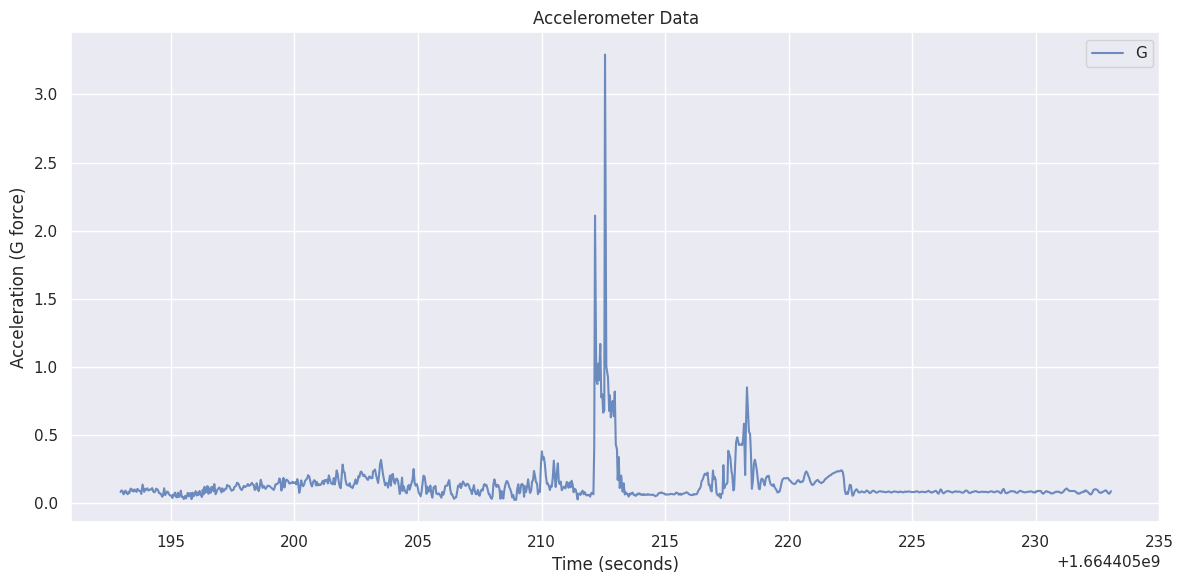

In [4]:
df = df_sensor.loc[df_sensor['id']=='003341ed-22bb-4a31-91f0-38b97785eab6'].reset_index(drop=True)
df = df.set_index('id')
df['g'] = np.sqrt(df['x']**2 + (1 - df['y'])**2 + df['z']**2)
plot_time_series(df)

In [35]:
features = pd.read_csv('extract_features_all.csv', index_col=[0])
df_audio = pd.concat([pd.read_csv('peak_audio_features_train.csv'), pd.read_csv('peak_audio_features_test.csv')]).drop('label',axis=1)
train_ids = pd.read_csv('df_train_collision.csv').id
test_ids = pd.read_csv('df_test_collision.csv').id
train_ids = train_ids[train_ids.isin(df_audio['video_id'])]
test_ids = test_ids[test_ids.isin(df_audio['video_id'])]
train_ids = train_ids[train_ids.isin(features.index)]
test_ids = test_ids[test_ids.isin(features.index)]
len(train_ids), len(test_ids)

(31581, 4928)

# IMU

In [71]:
fi = pd.read_csv('features_iteration_13.csv')['feature_name'].to_list()[:100]
features = features[fi + ['collision_label']]


=== Analyzing Segment: g_max < 1.0 ===
Segment size: 3965 samples


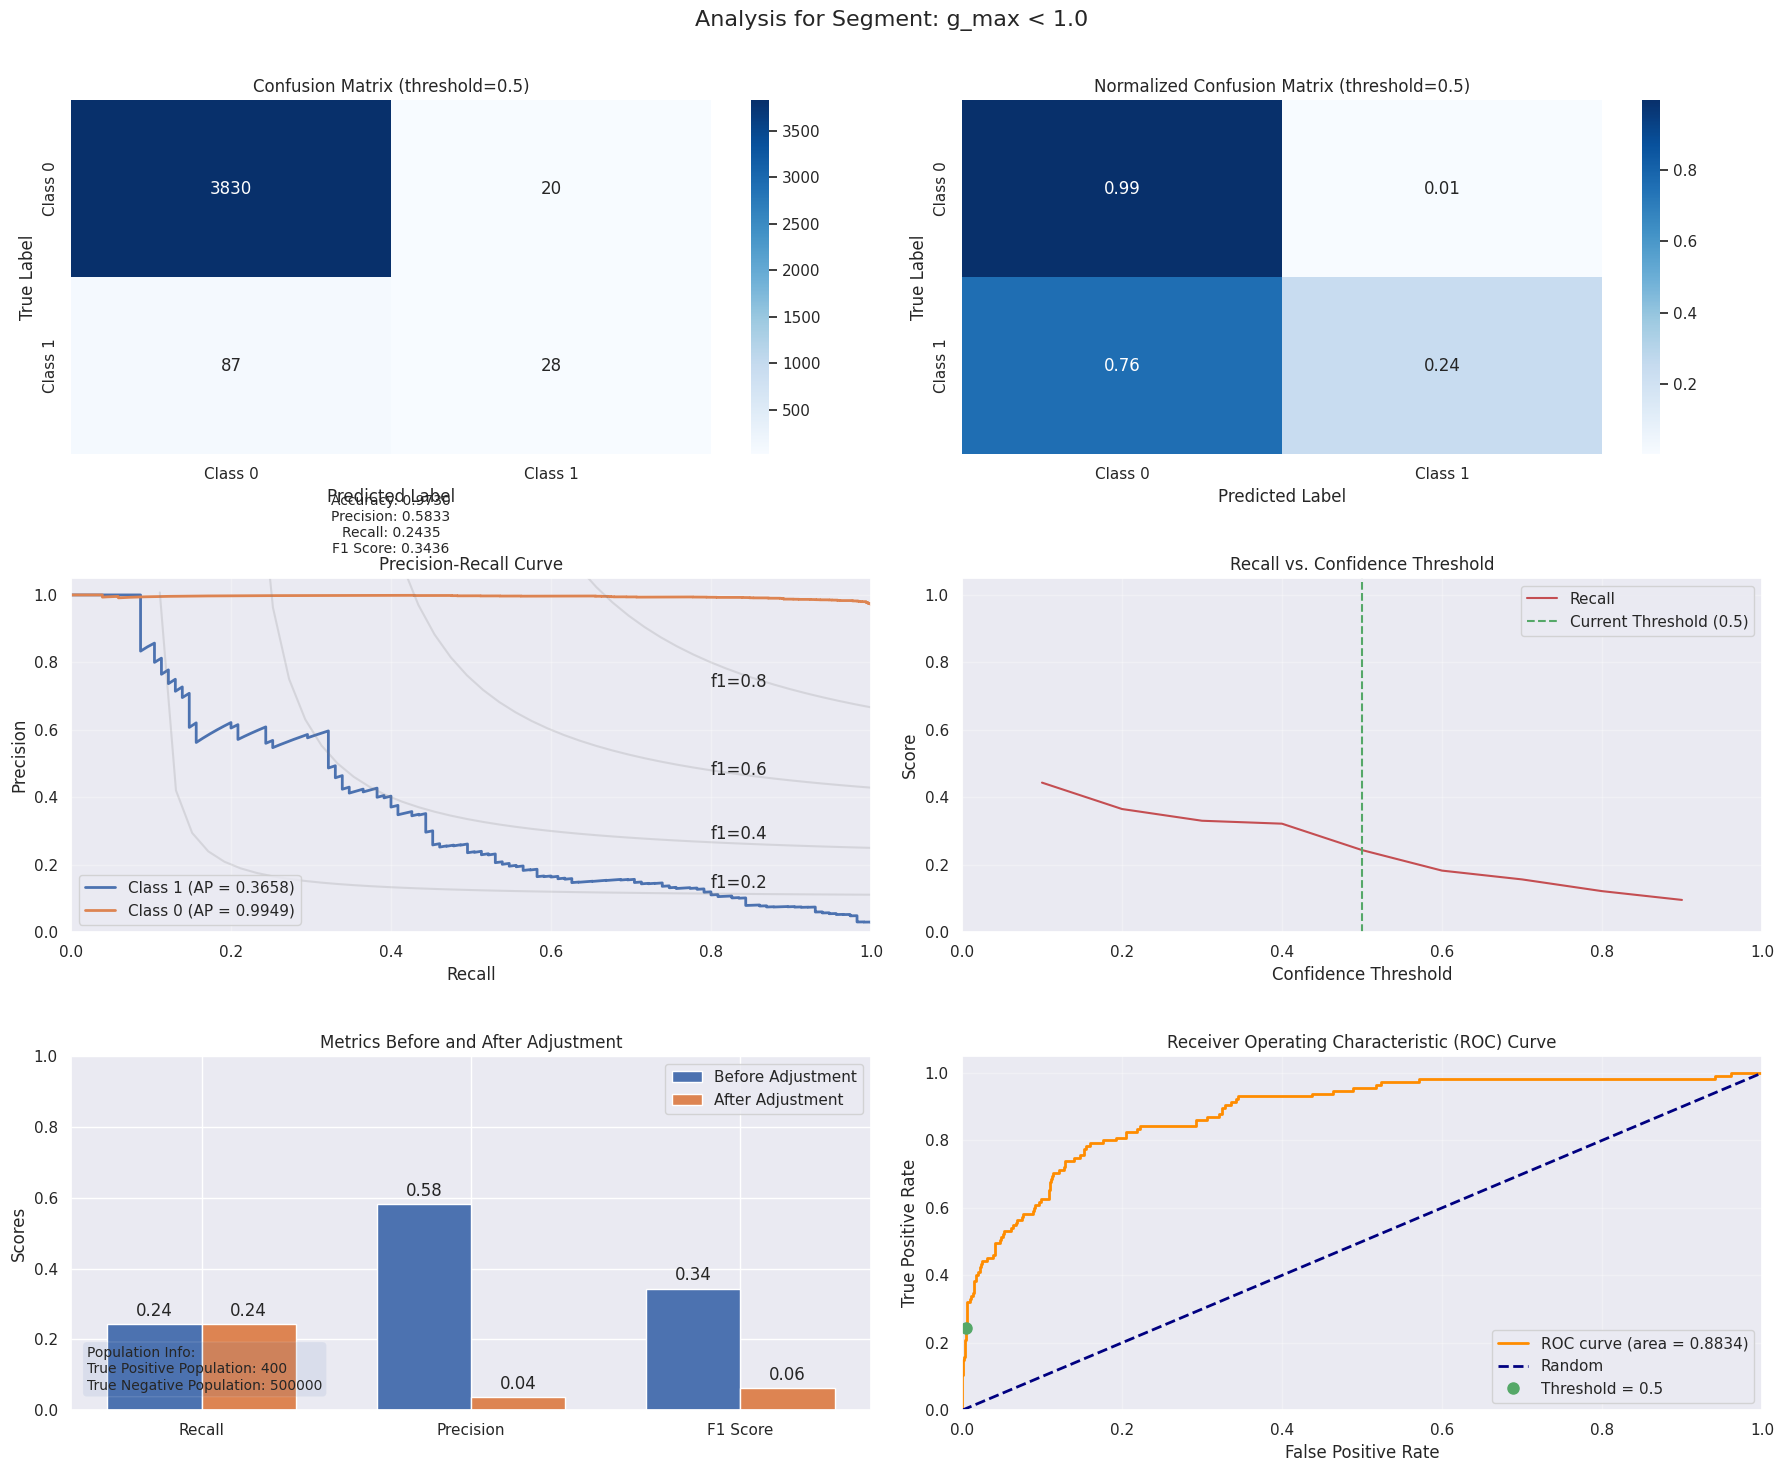


Segment: g_max < 1.0
True Positive Population: 400
True Negative Population: 500000
Samples: 3965
TN: 3830
FP: 20
FN: 87
TP: 28
Recall: 0.2435
Precision: 0.5833
F1: 0.3436
ROC_AUC: 0.8834
Precision_adj: 0.0361
F1_adj: 0.0629
Pop_TP: 400
Pop_TN: 500000

=== Analyzing Segment: 1.0 ≤ g_max < 1.4 ===
Segment size: 587 samples


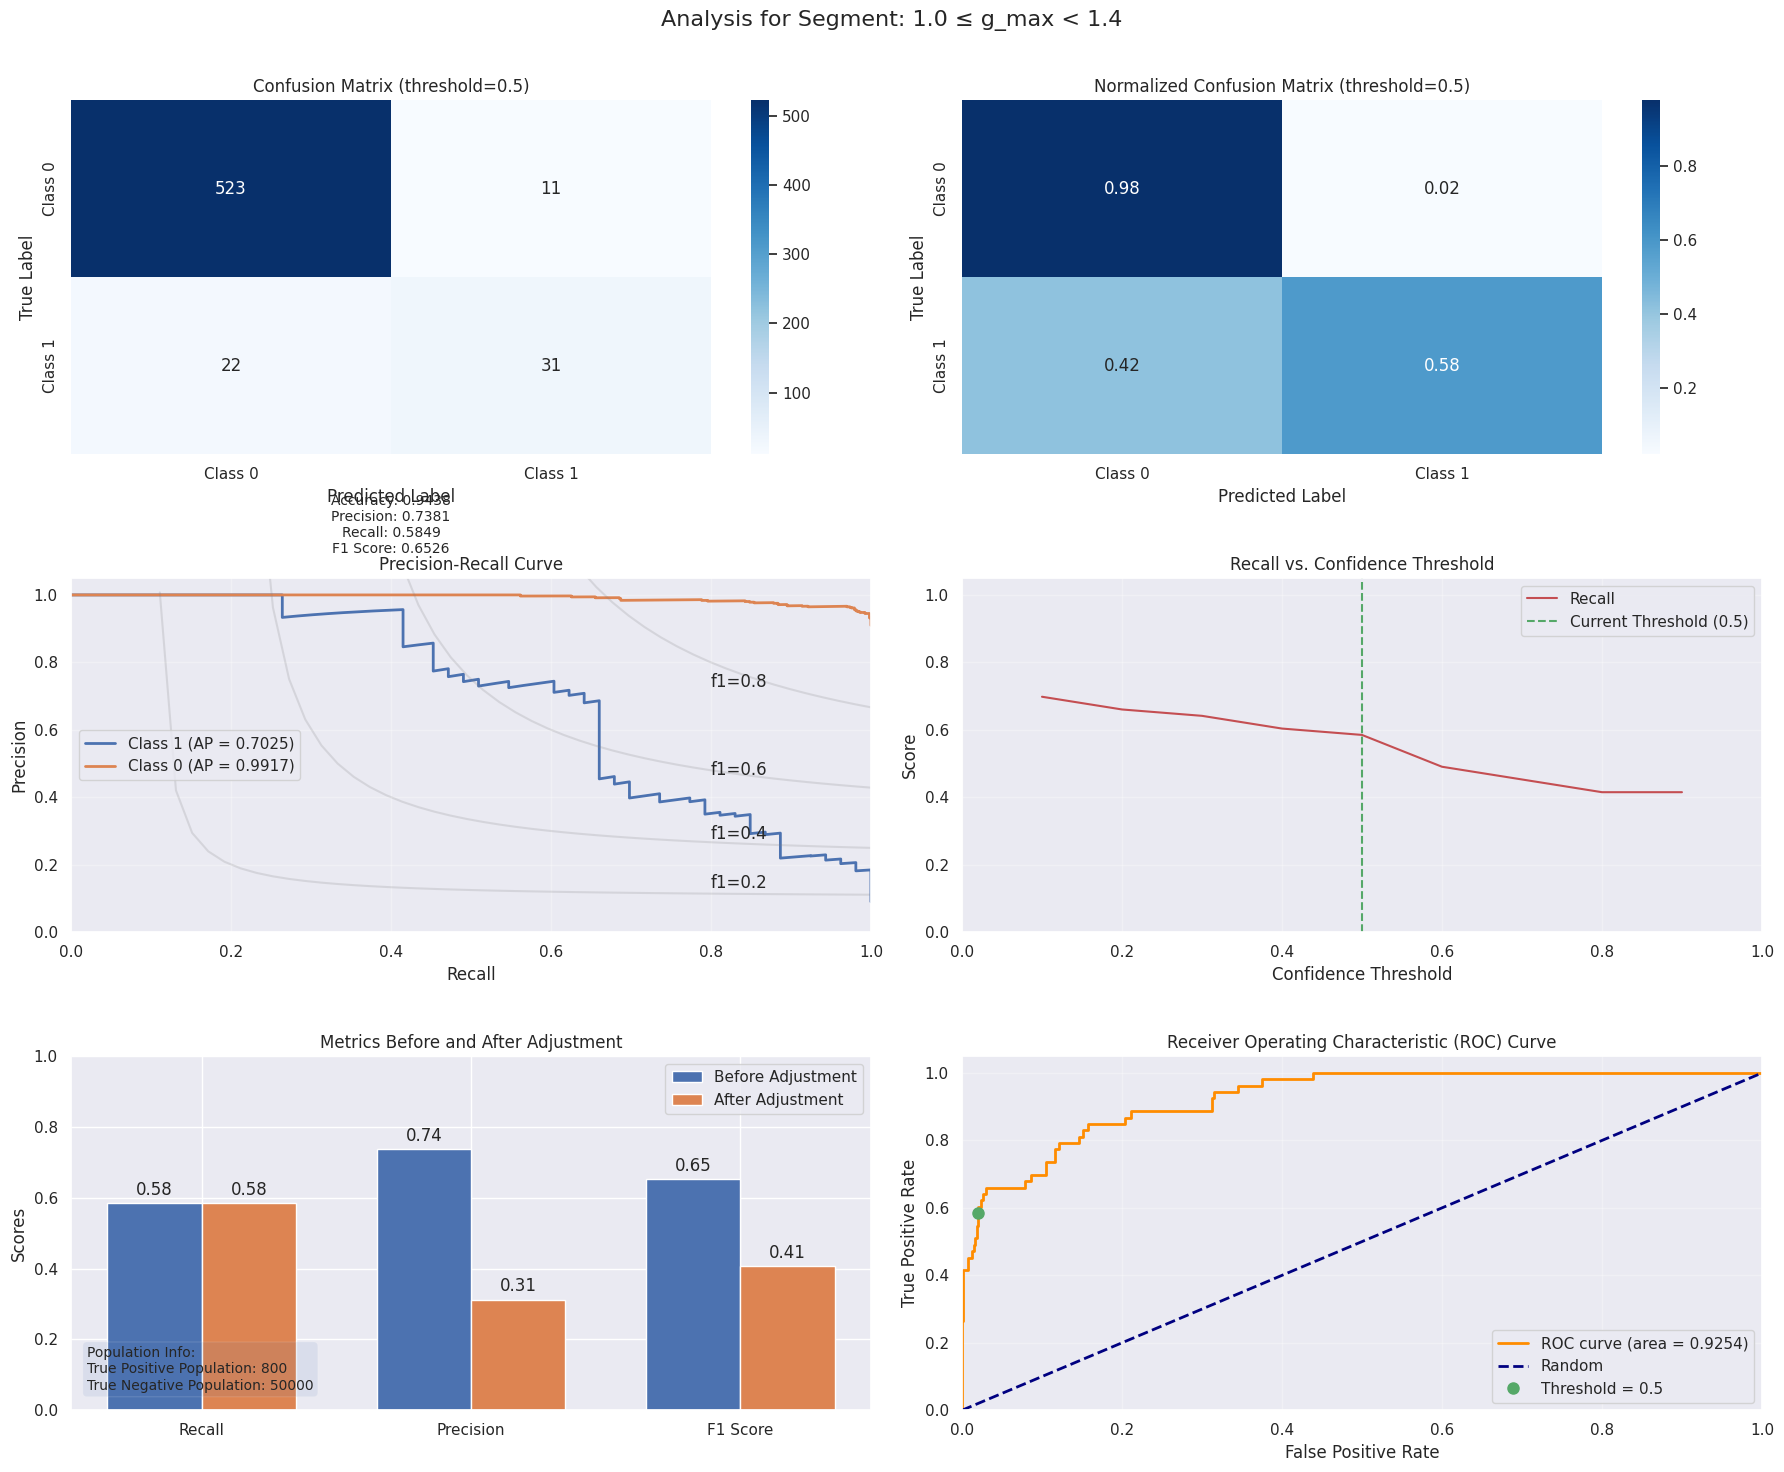


Segment: 1.0 ≤ g_max < 1.4
True Positive Population: 800
True Negative Population: 50000
Samples: 587
TN: 523
FP: 11
FN: 22
TP: 31
Recall: 0.5849
Precision: 0.7381
F1: 0.6526
ROC_AUC: 0.9254
Precision_adj: 0.3124
F1_adj: 0.4073
Pop_TP: 800
Pop_TN: 50000

=== Analyzing Segment: g_max ≥ 1.4 ===
Segment size: 376 samples


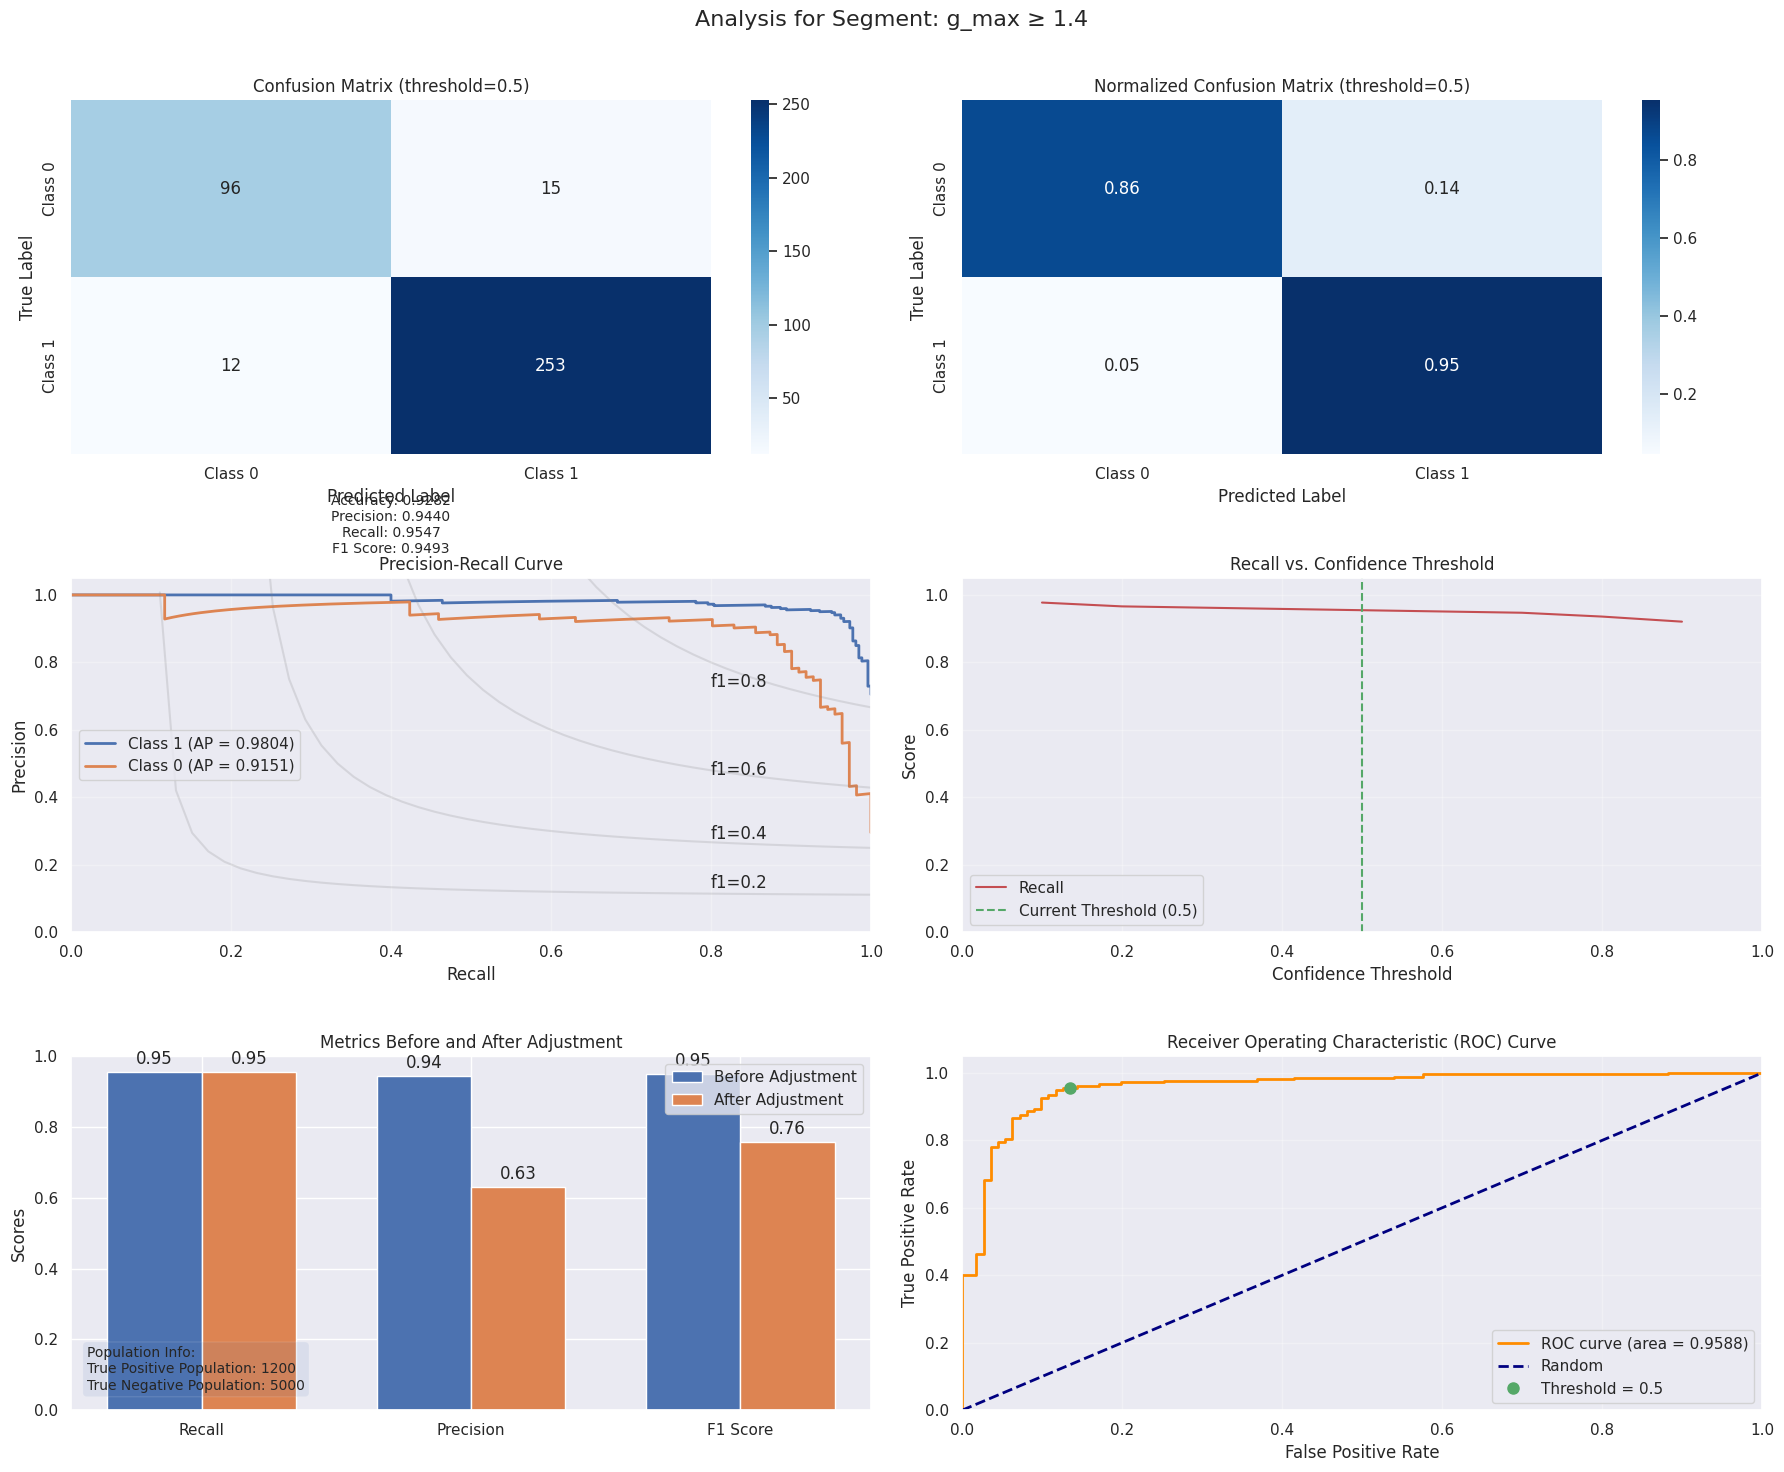


Segment: g_max ≥ 1.4
True Positive Population: 1200
True Negative Population: 5000
Samples: 376
TN: 96
FP: 15
FN: 12
TP: 253
Recall: 0.9547
Precision: 0.9440
F1: 0.9493
ROC_AUC: 0.9588
Precision_adj: 0.6290
F1_adj: 0.7584
Pop_TP: 1200
Pop_TN: 5000


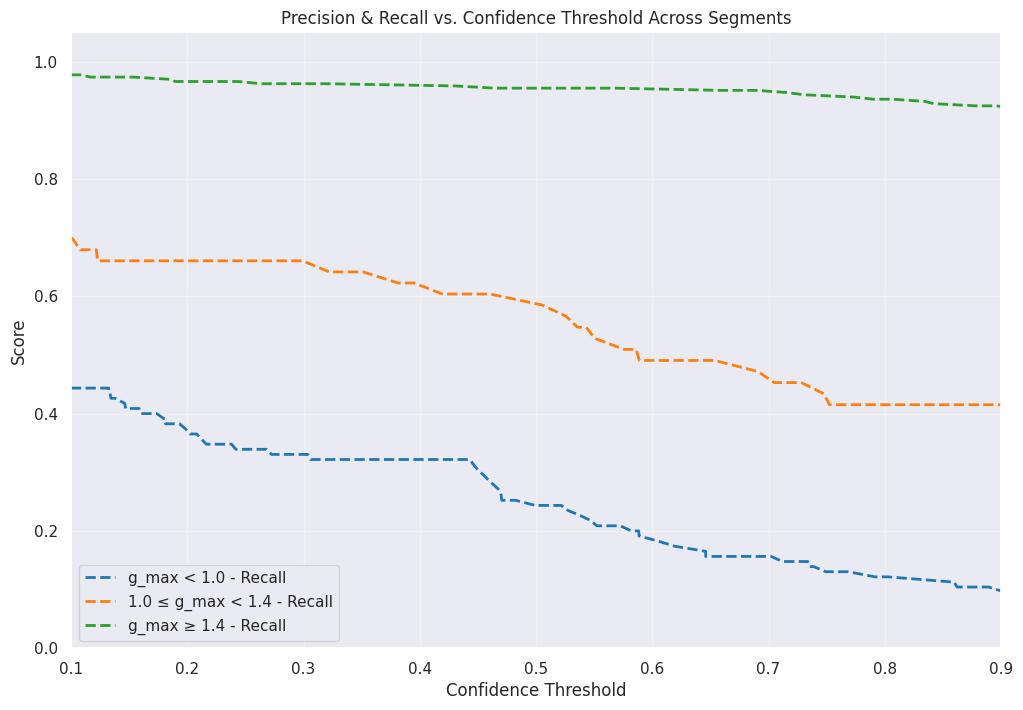

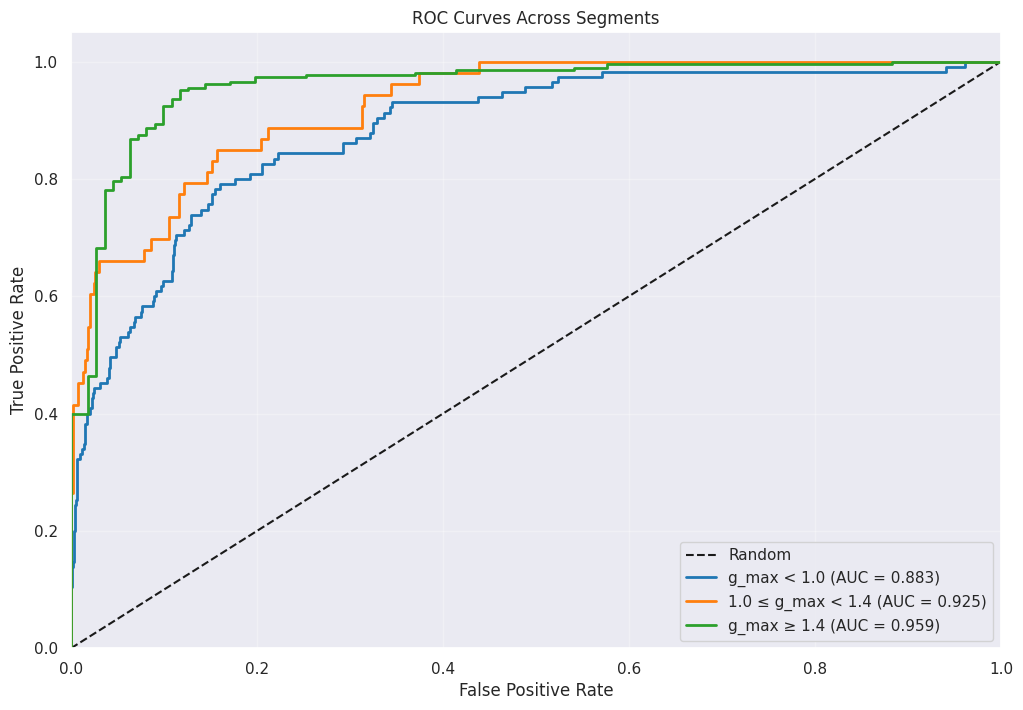

In [37]:
exp_mang, data_manager = train_binary_tabular_model(features, 'collision_label', train_ids, test_ids)
best_model_imu = exp_mang.get_best_model()
X_val, y_val = data_manager.get_validation_data()

y_pred = best_model_imu.model.predict(X_val)
y_prob = best_model_imu.model.predict_proba(X_val)
preds = pd.DataFrame({
    'id': X_val.index,
    'y_pred': y_pred,
    'y_true': y_val,
    'y_prob_0': y_prob[:, 0],
    'y_prob_1': y_prob[:, 1]
})

summary_df, (metrics_fig, pop_fig, data_points_imu) = analyze_by_segment(preds, meta_df)

 96%|=================== | 4724/4928 [00:17<00:00]         

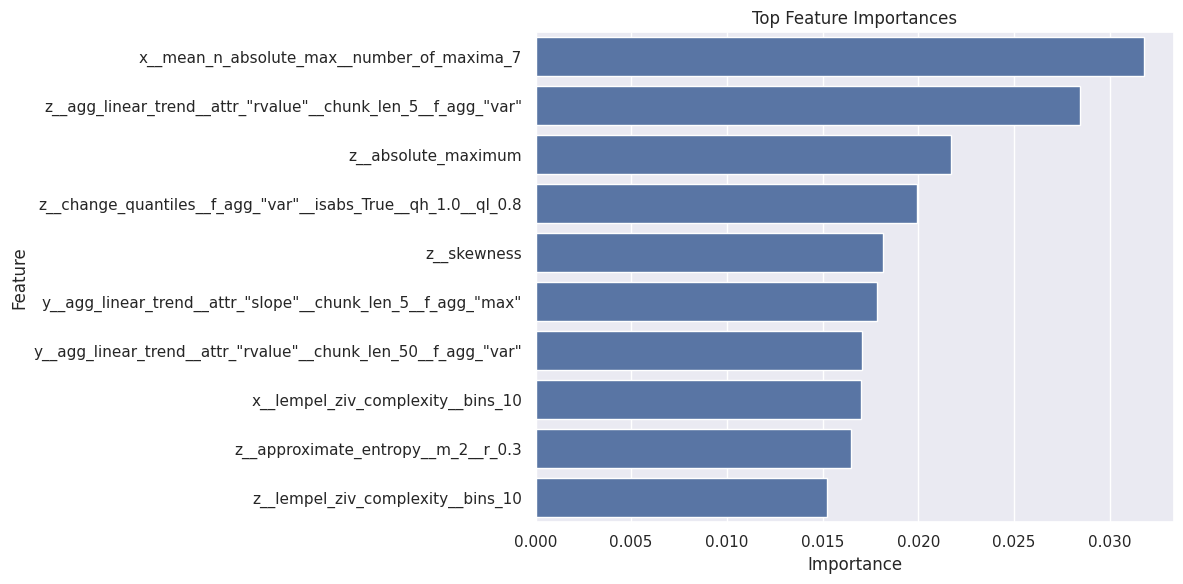

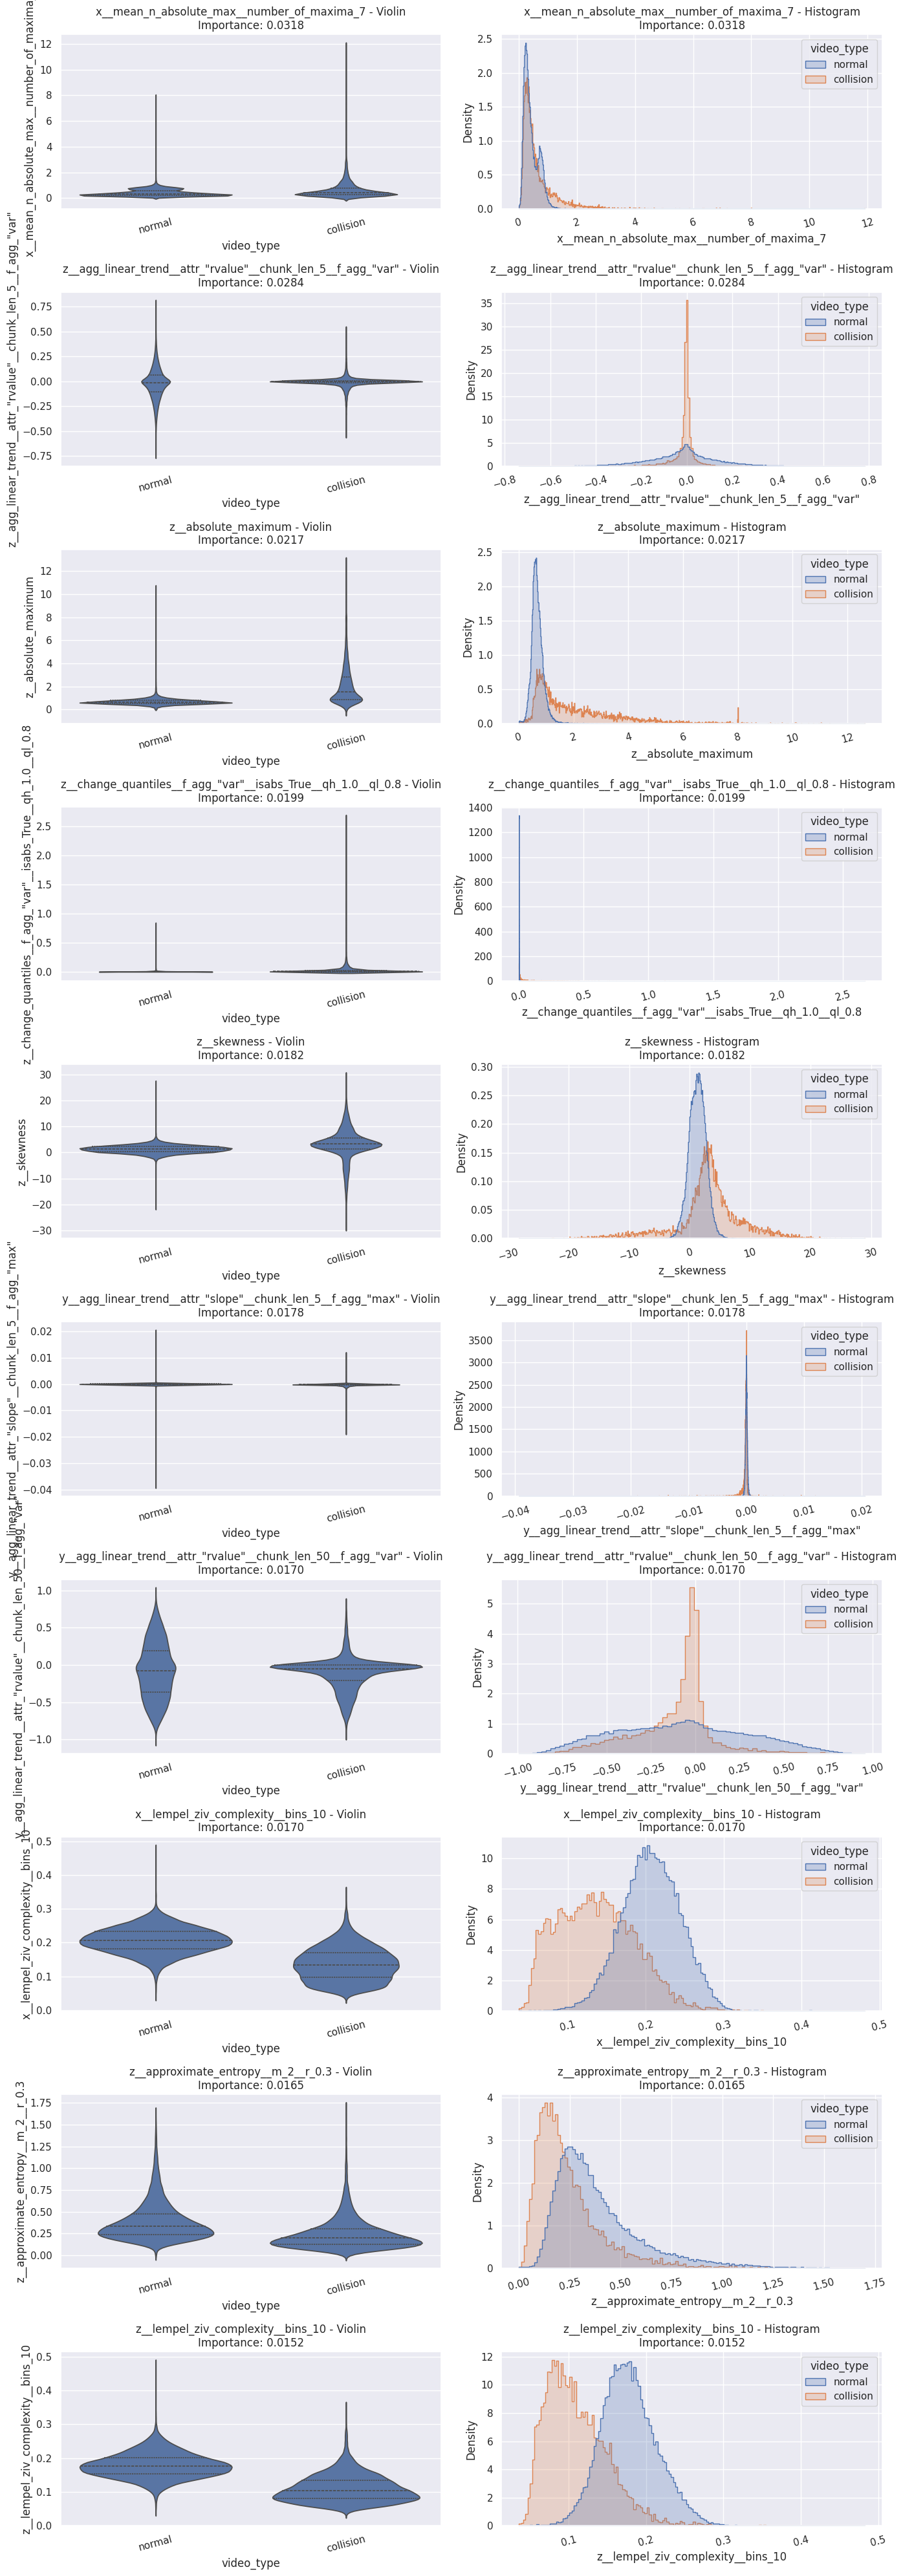

In [38]:
interp = TabularInterpreterBinaryClassification(
    model=best_model_imu,
    data_manager=data_manager,
    opt_metric=exp_mang.opt_metric,
    pos_class={'pos_class': 1},
    shap_timeout=300
)
fi_imu = interp.get_feature_importance().sort_values('feature_importance_vals', ascending=False)
plot_top_features(fi_imu[fi_imu['feature_importance_vals'] > 0], features, meta_df)

# IMU + Audio


=== Analyzing Segment: g_max < 1.0 ===
Segment size: 3965 samples


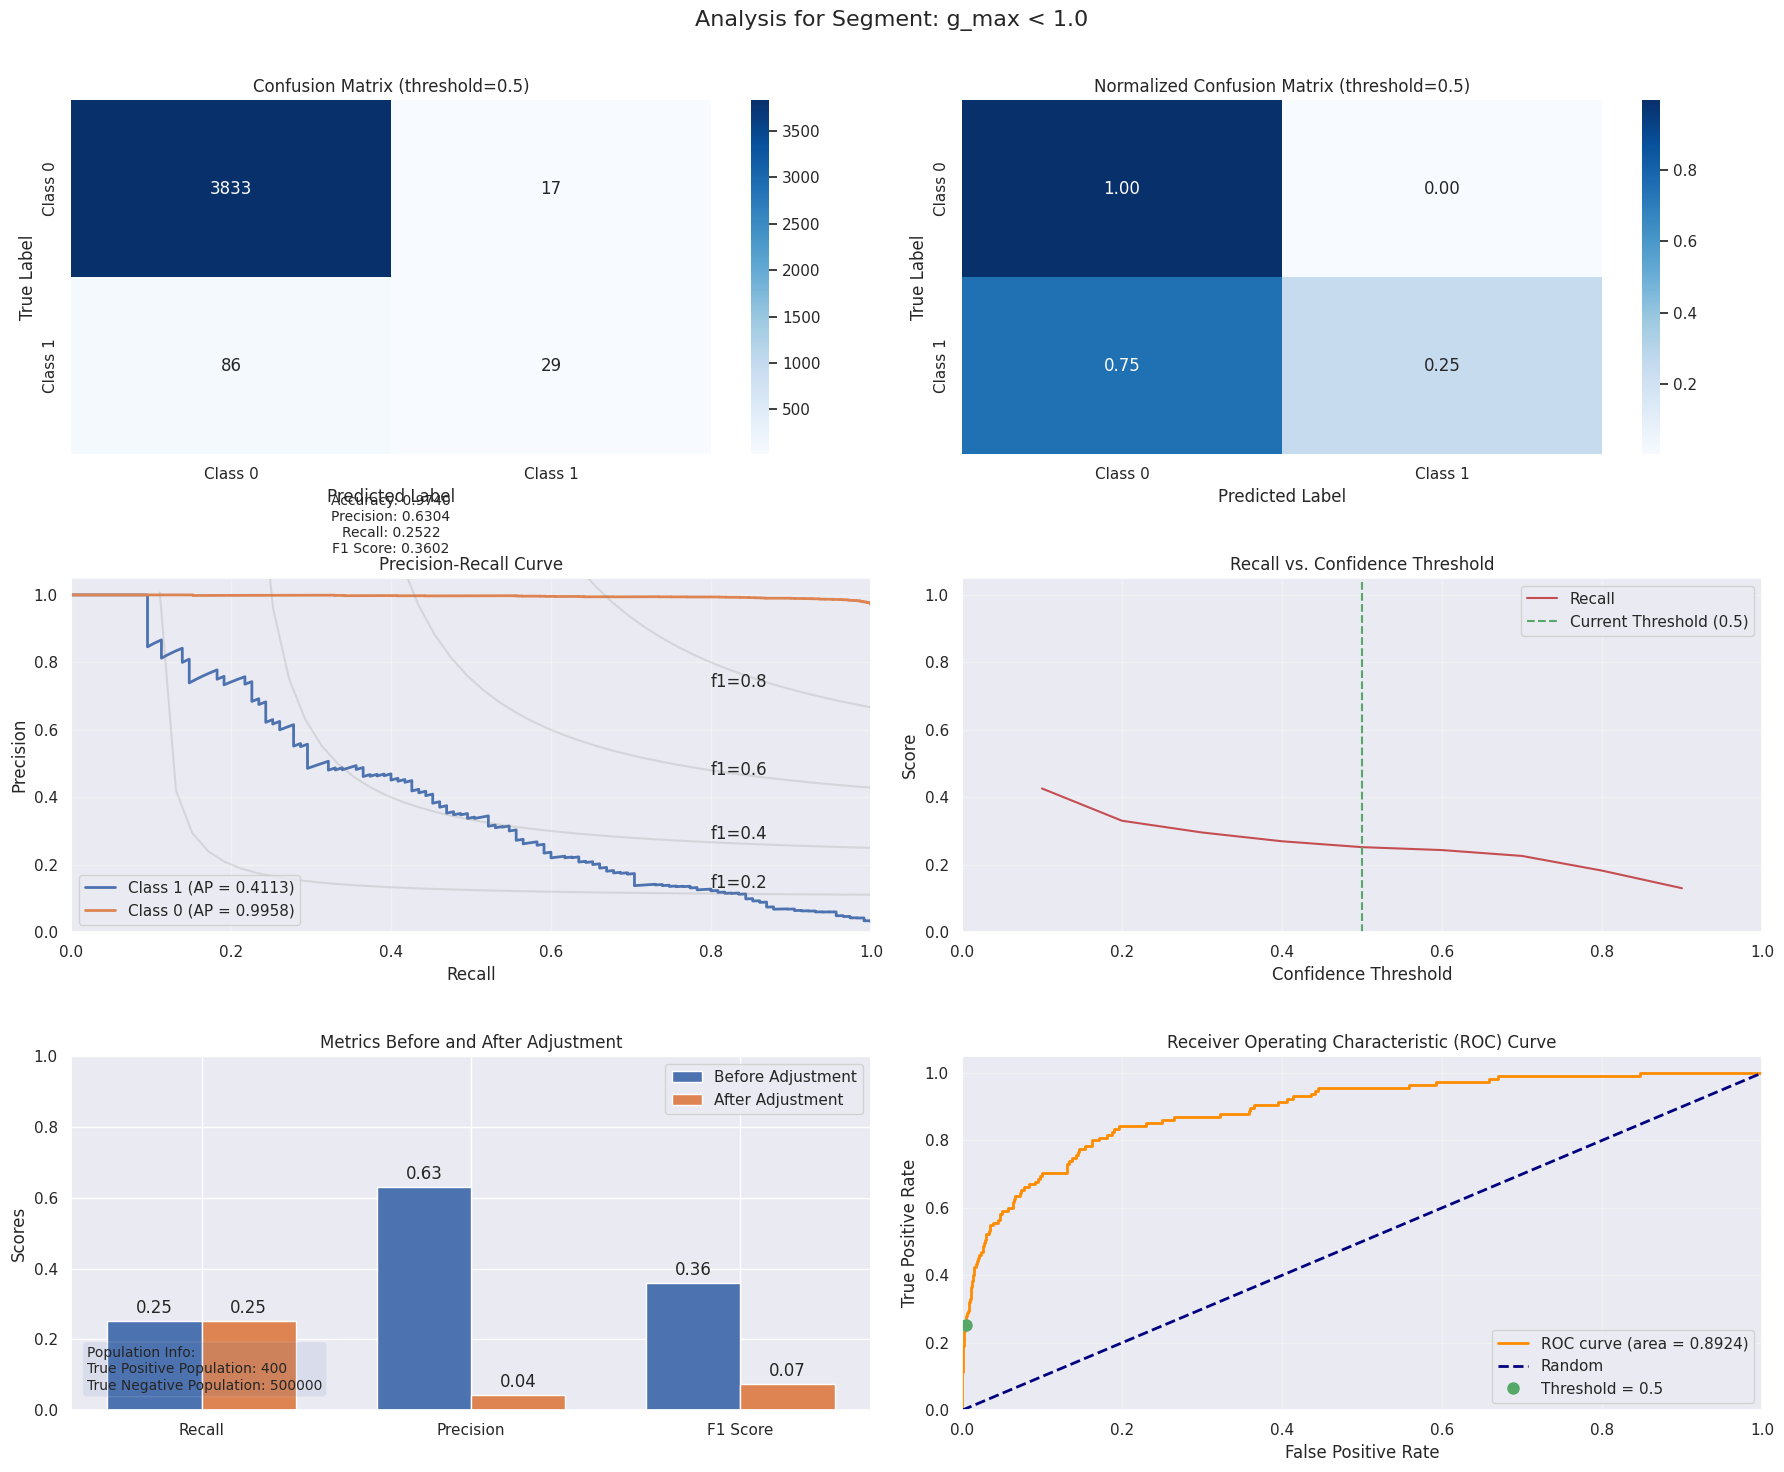


Segment: g_max < 1.0
True Positive Population: 400
True Negative Population: 500000
Samples: 3965
TN: 3833
FP: 17
FN: 86
TP: 29
Recall: 0.2522
Precision: 0.6304
F1: 0.3602
ROC_AUC: 0.8924
Precision_adj: 0.0437
F1_adj: 0.0745
Pop_TP: 400
Pop_TN: 500000

=== Analyzing Segment: 1.0 ≤ g_max < 1.4 ===
Segment size: 587 samples


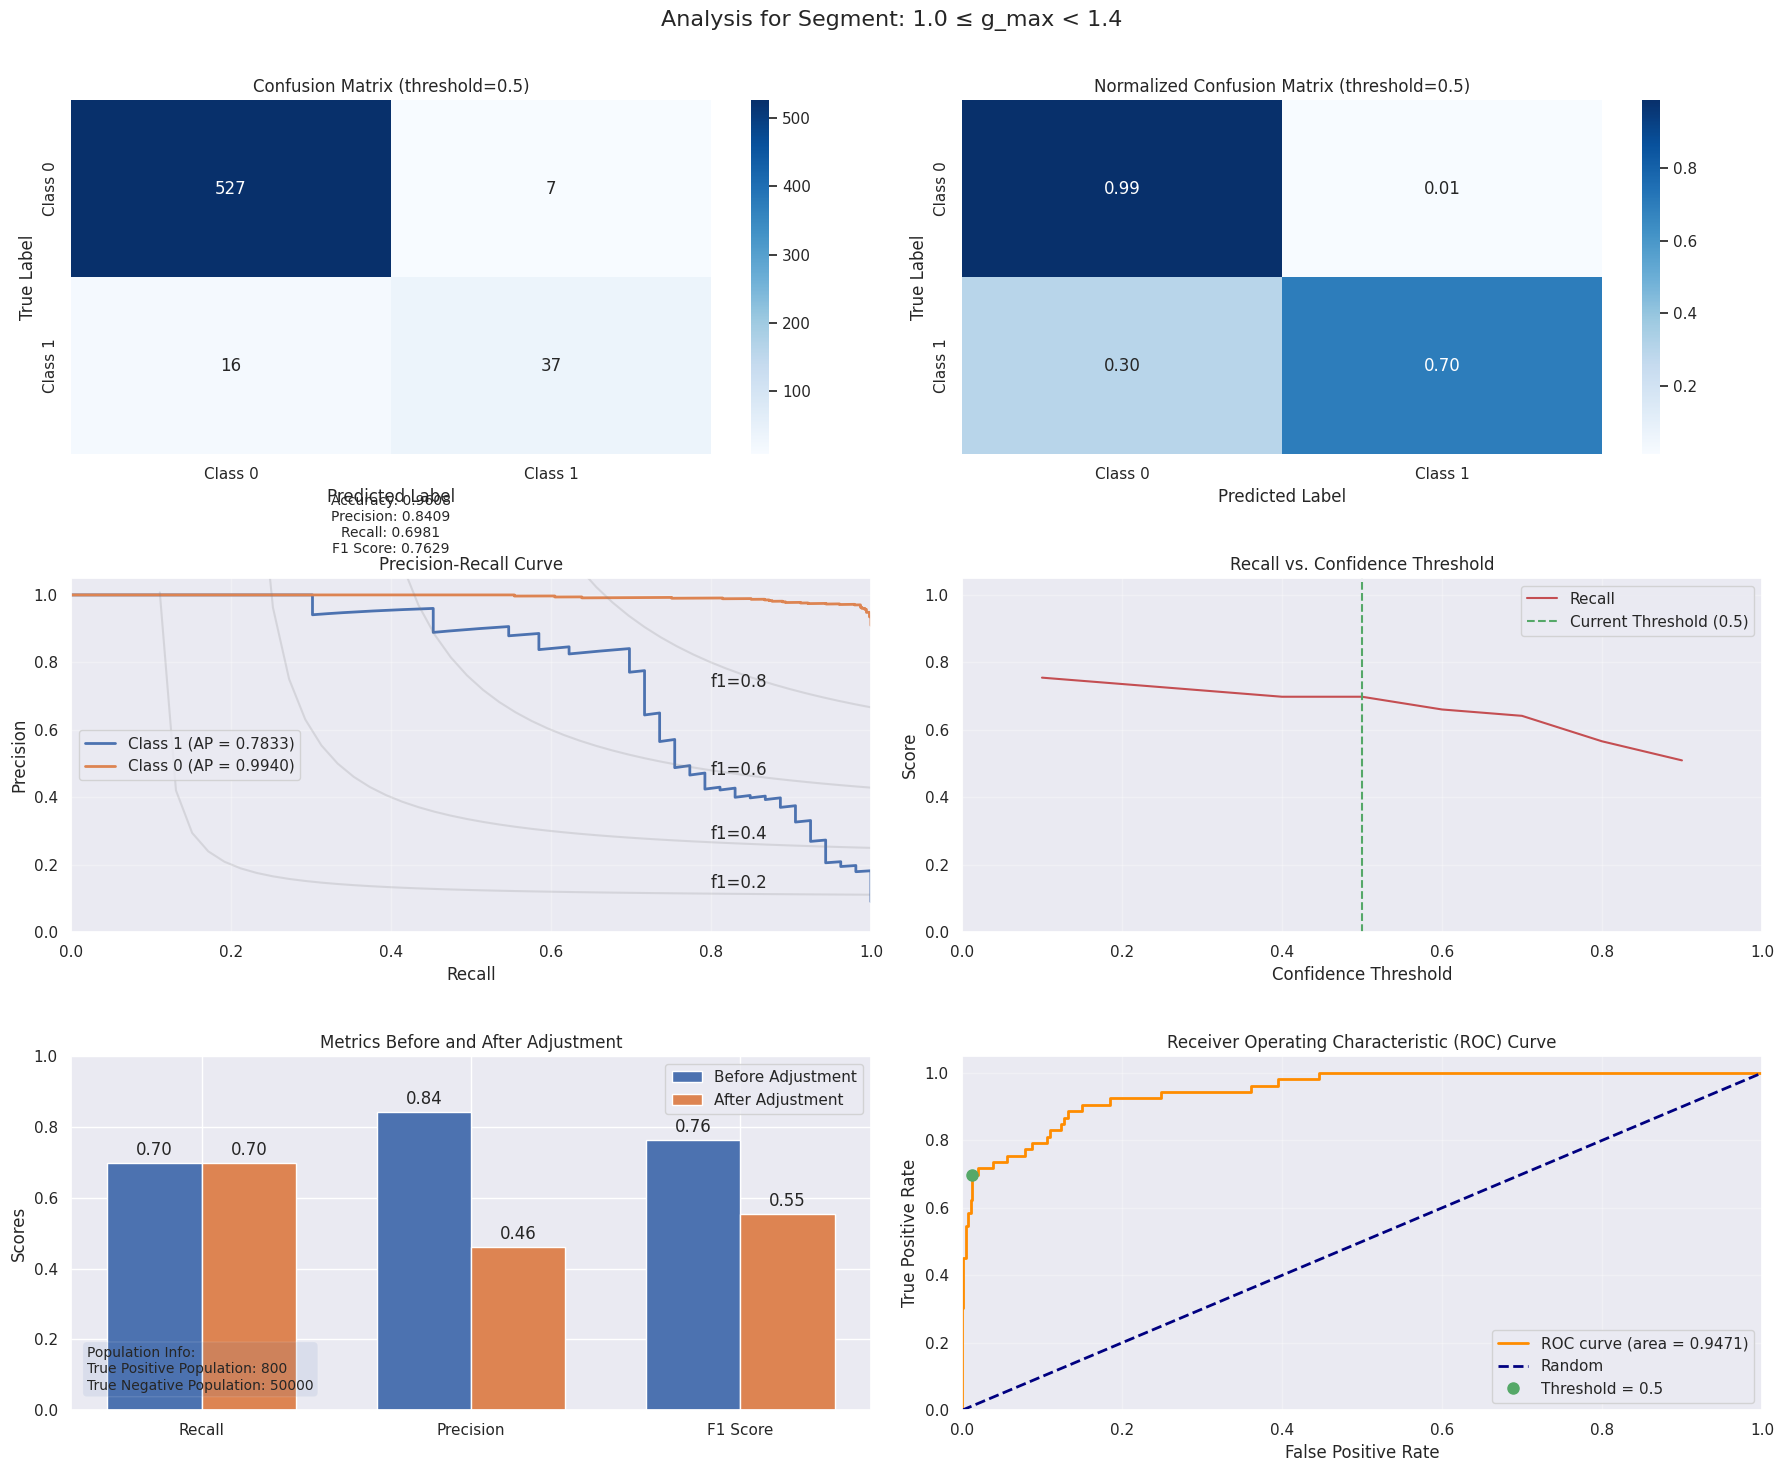


Segment: 1.0 ≤ g_max < 1.4
True Positive Population: 800
True Negative Population: 50000
Samples: 587
TN: 527
FP: 7
FN: 16
TP: 37
Recall: 0.6981
Precision: 0.8409
F1: 0.7629
ROC_AUC: 0.9471
Precision_adj: 0.4601
F1_adj: 0.5546
Pop_TP: 800
Pop_TN: 50000

=== Analyzing Segment: g_max ≥ 1.4 ===
Segment size: 376 samples


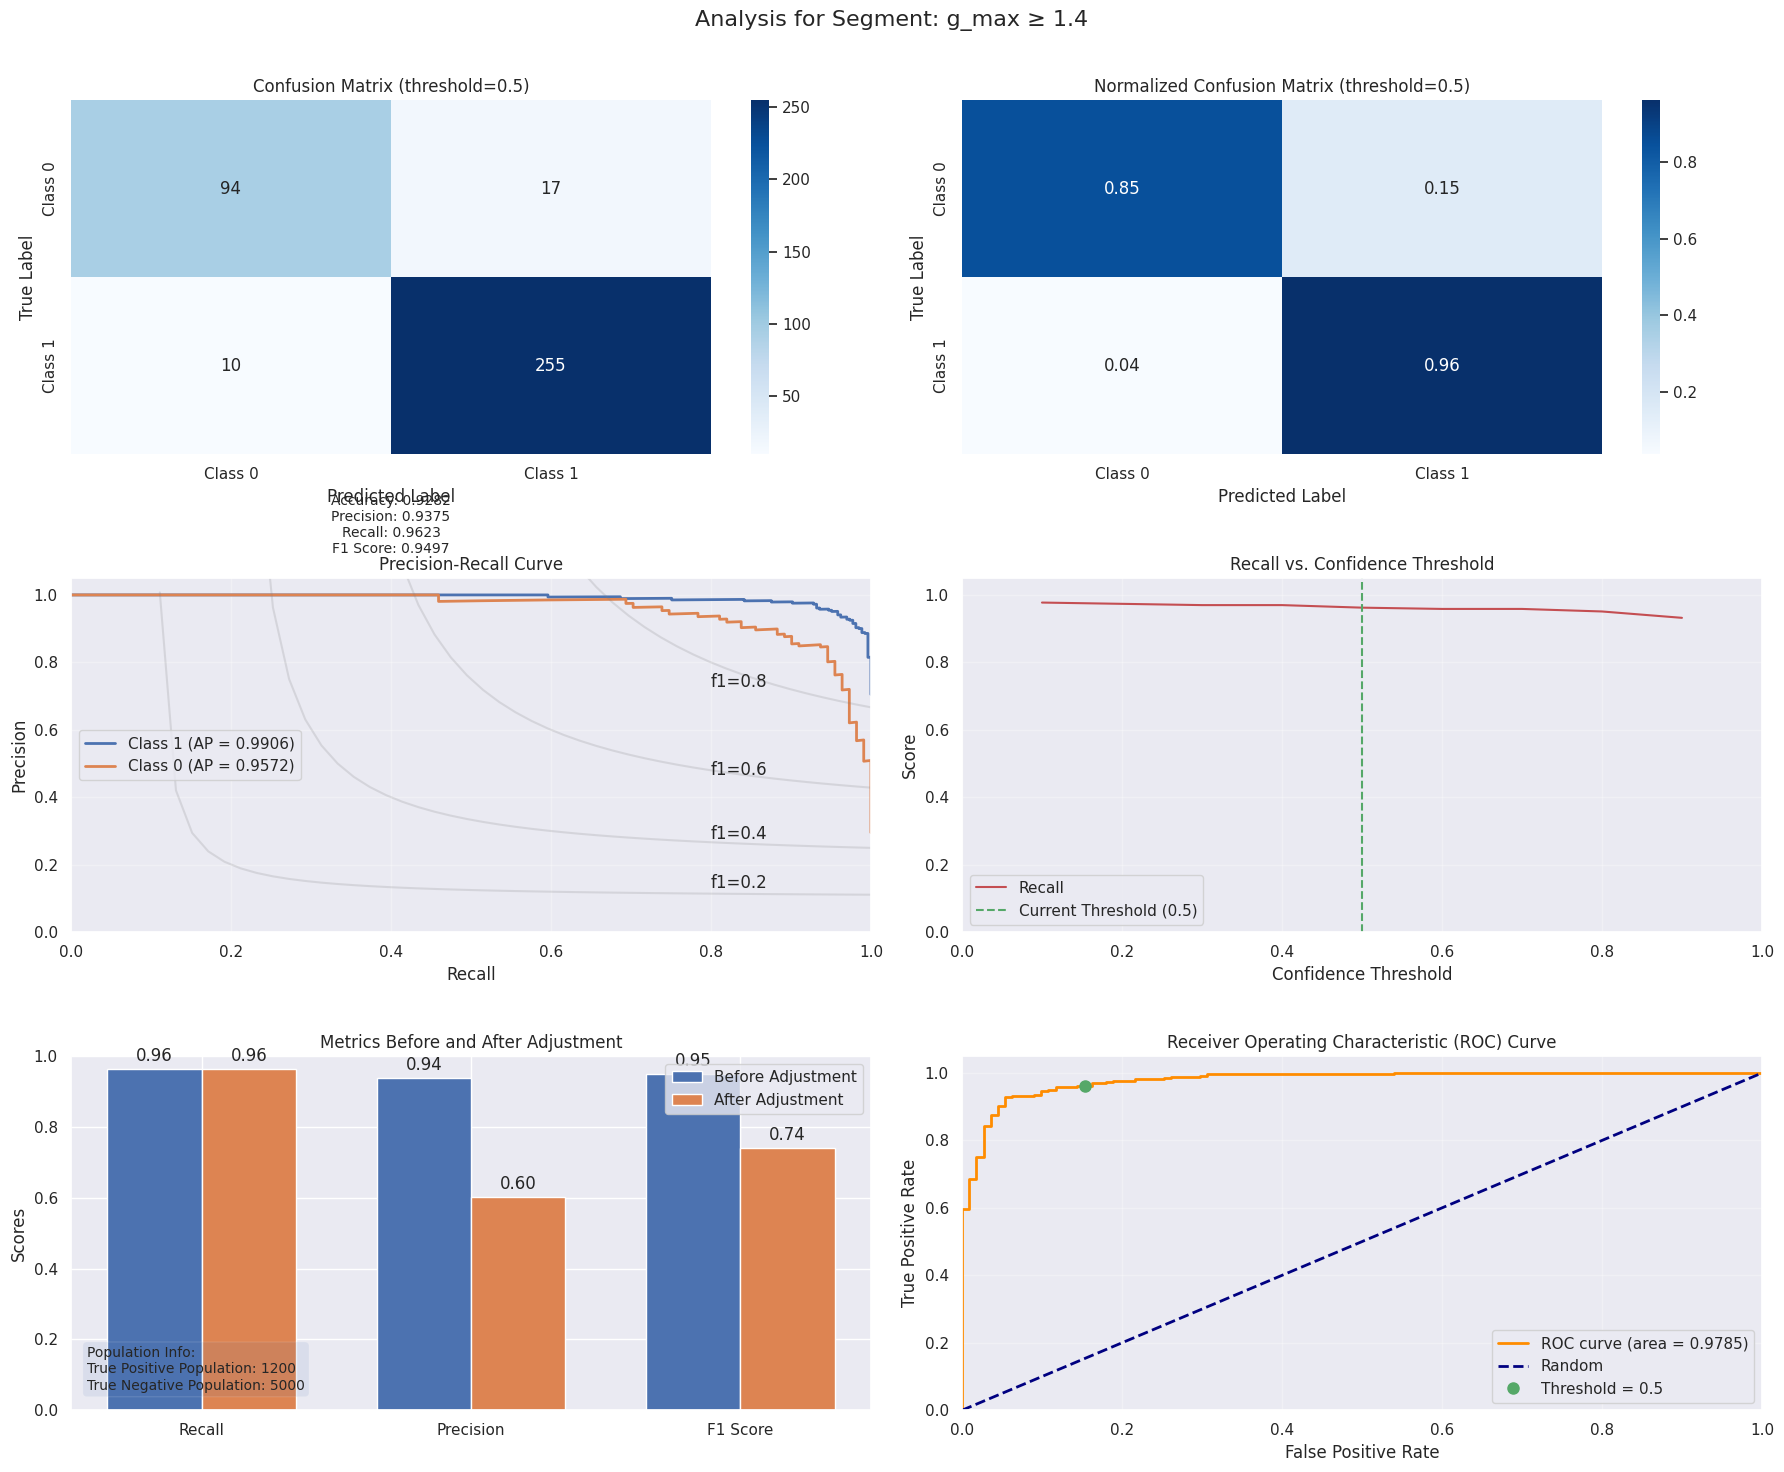


Segment: g_max ≥ 1.4
True Positive Population: 1200
True Negative Population: 5000
Samples: 376
TN: 94
FP: 17
FN: 10
TP: 255
Recall: 0.9623
Precision: 0.9375
F1: 0.9497
ROC_AUC: 0.9785
Precision_adj: 0.6013
F1_adj: 0.7401
Pop_TP: 1200
Pop_TN: 5000


 98%|===================| 4811/4928 [00:20<00:00]          

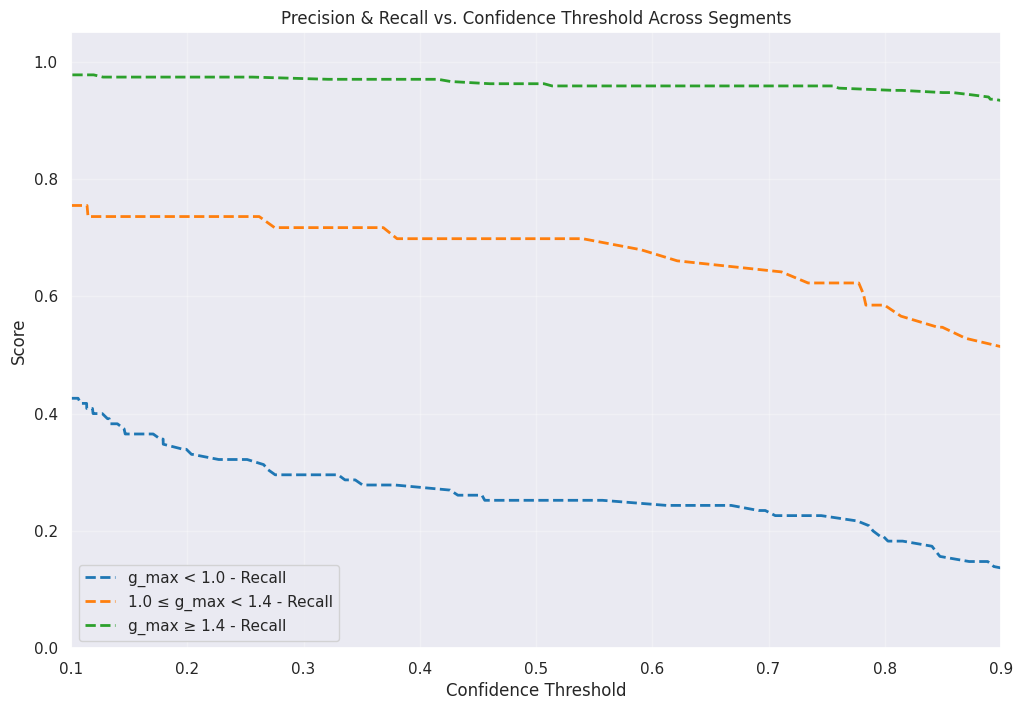

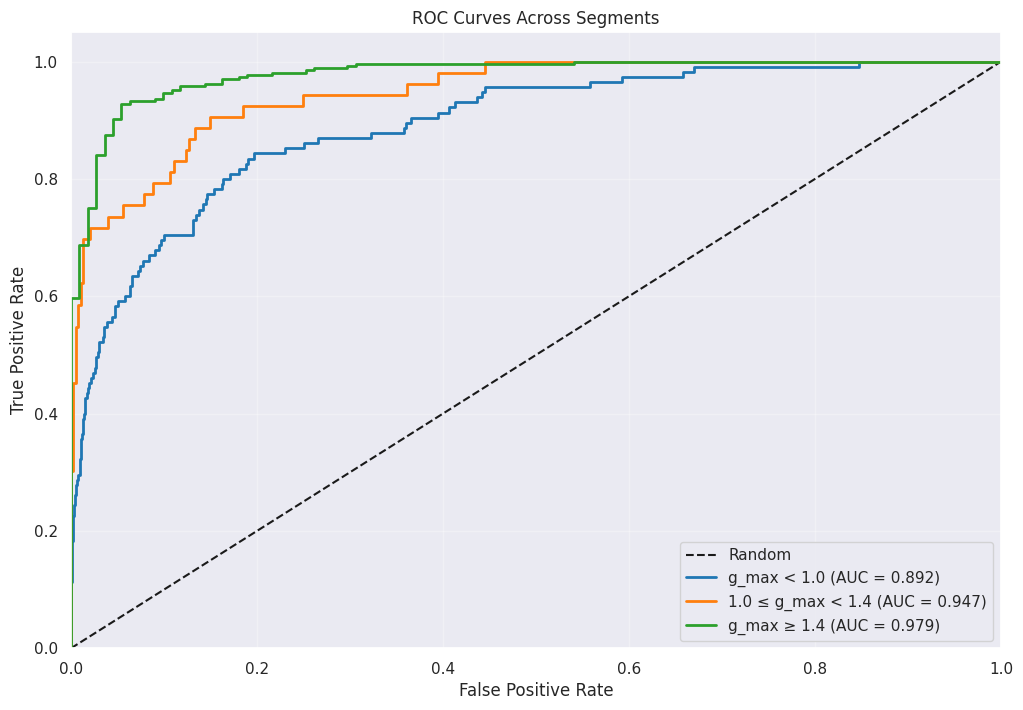

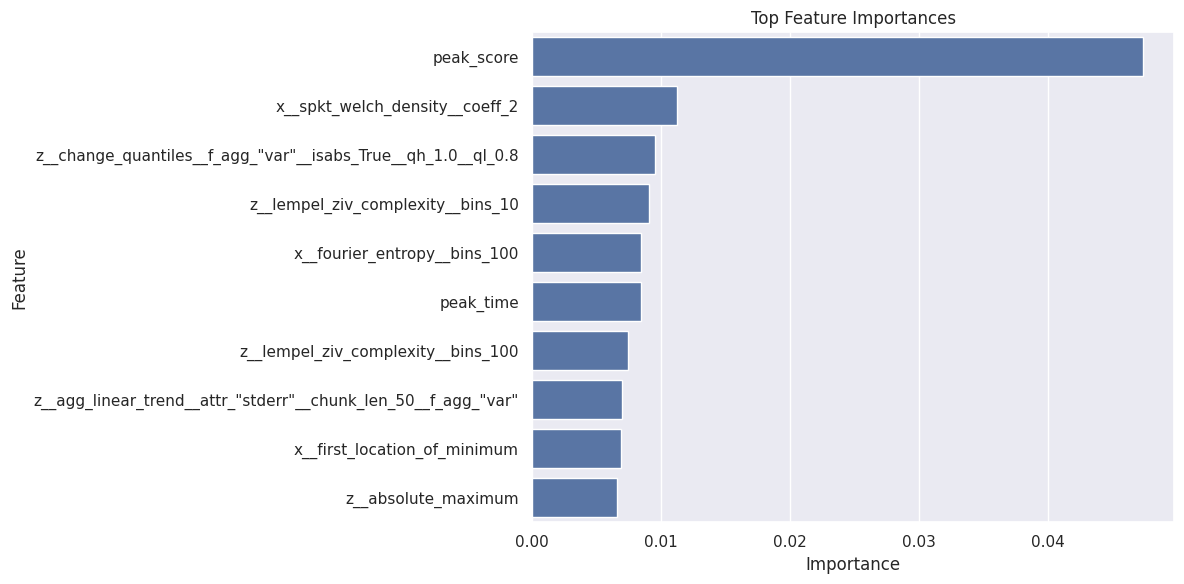

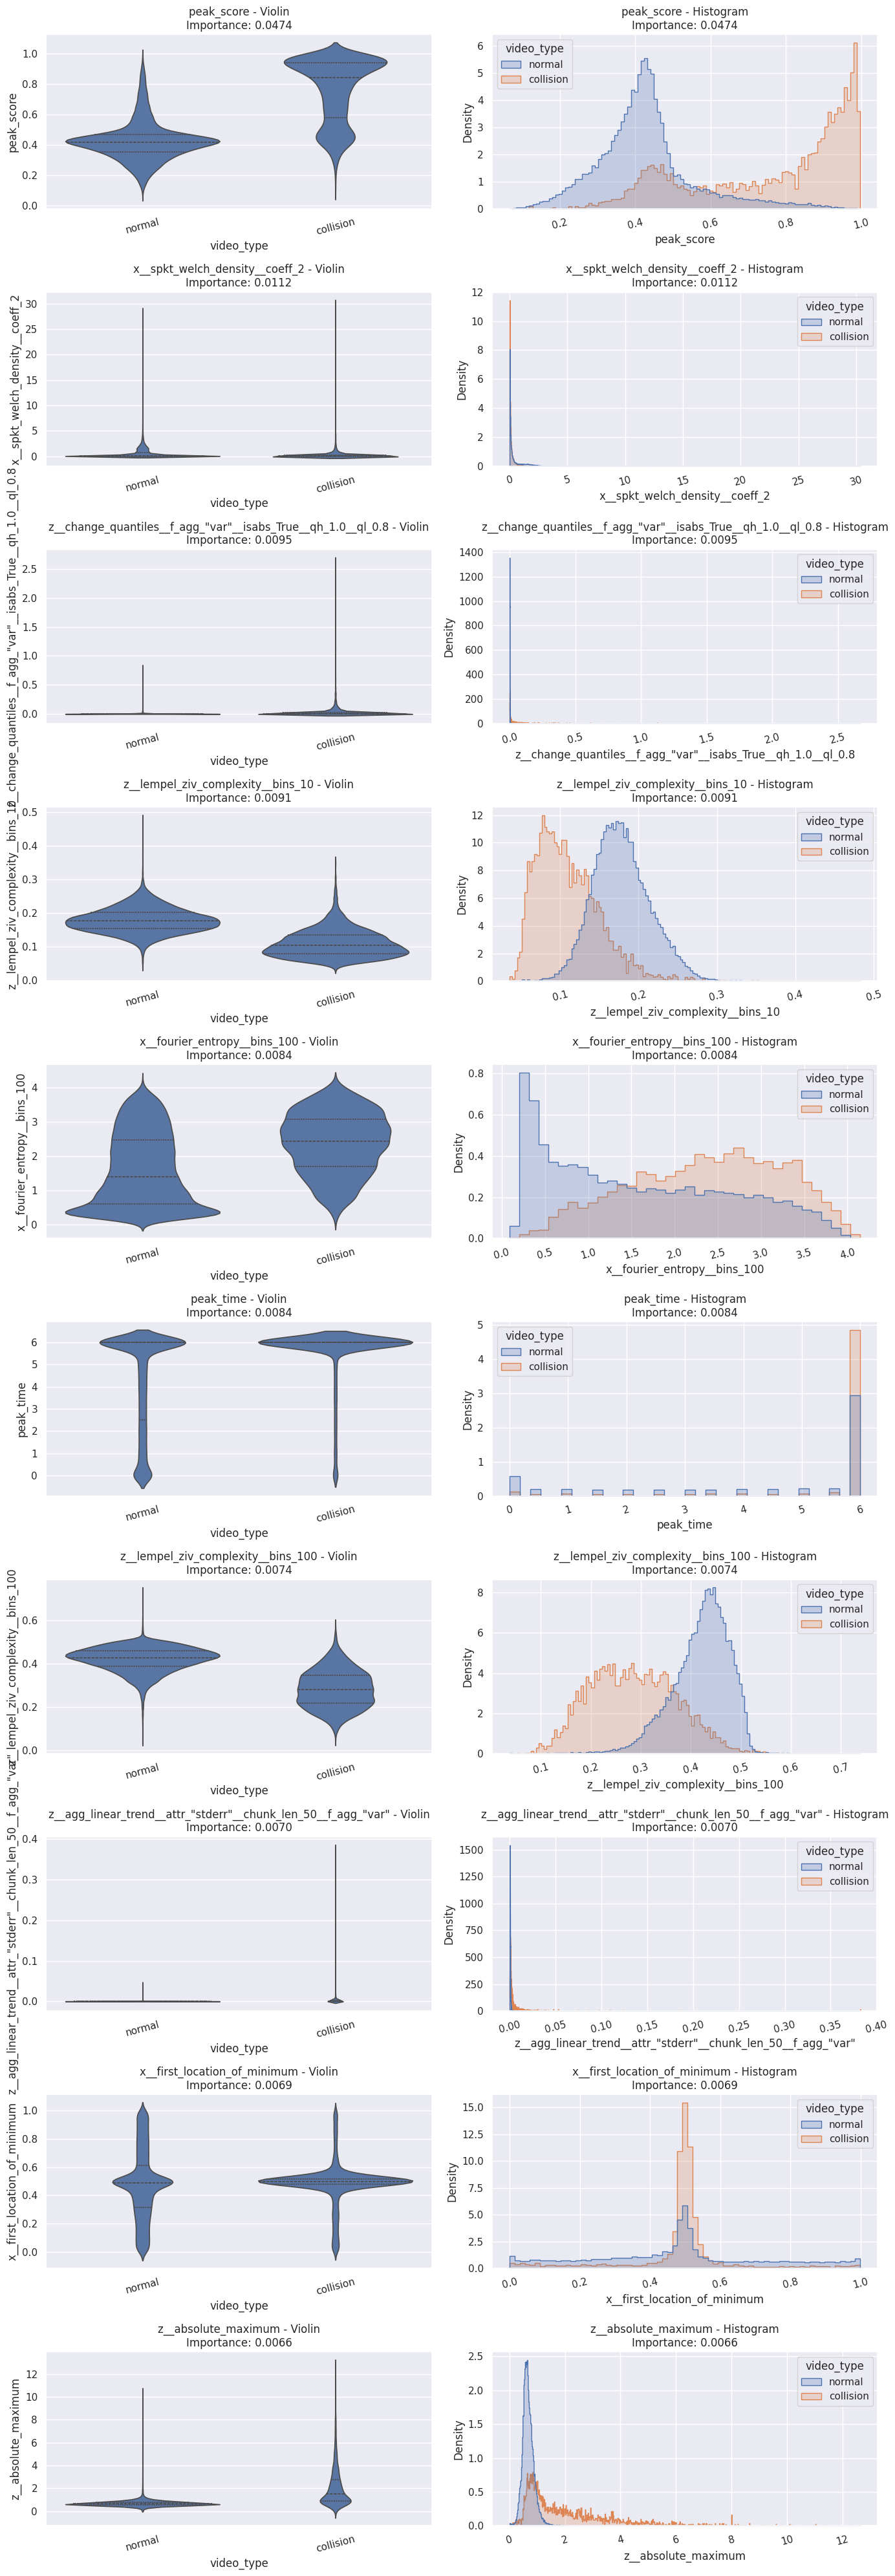

In [60]:
features = pd.read_csv('extract_features_all.csv', index_col=[0])
df_imu_audio = df_audio.merge(features.reset_index(), left_on="video_id", right_on="index", how="inner").set_index('video_id').drop('index', axis=1)

exp_mang, data_manager = train_binary_tabular_model(df_imu_audio, 'collision_label', train_ids, test_ids)
best_model_imu_audio = exp_mang.get_best_model()
X_val, y_val = data_manager.get_validation_data()

y_pred = best_model_imu_audio.model.predict(X_val)
y_prob = best_model_imu_audio.model.predict_proba(X_val)
preds = pd.DataFrame({
    'id': X_val.index,
    'y_pred': y_pred,
    'y_true': y_val,
    'y_prob_0': y_prob[:, 0],
    'y_prob_1': y_prob[:, 1]
})

summary_df, (metrics_fig, pop_fig, data_points_imu_audio) = analyze_by_segment(preds, meta_df)

interp = TabularInterpreterBinaryClassification(
    model=best_model_imu_audio,
    data_manager=data_manager,
    opt_metric=exp_mang.opt_metric,
    pos_class={'pos_class': 1},
    shap_timeout=300
)
fi = interp.get_feature_importance().sort_values('feature_importance_vals', ascending=False)
plot_top_features(fi[fi['feature_importance_vals'] > 0], df_imu_audio, meta_df)
imp_imu_audio = fi[fi['feature_importance_vals'] > 0.0015]['col_name'].to_list()


=== Analyzing Segment: g_max < 1.0 ===
Segment size: 3965 samples


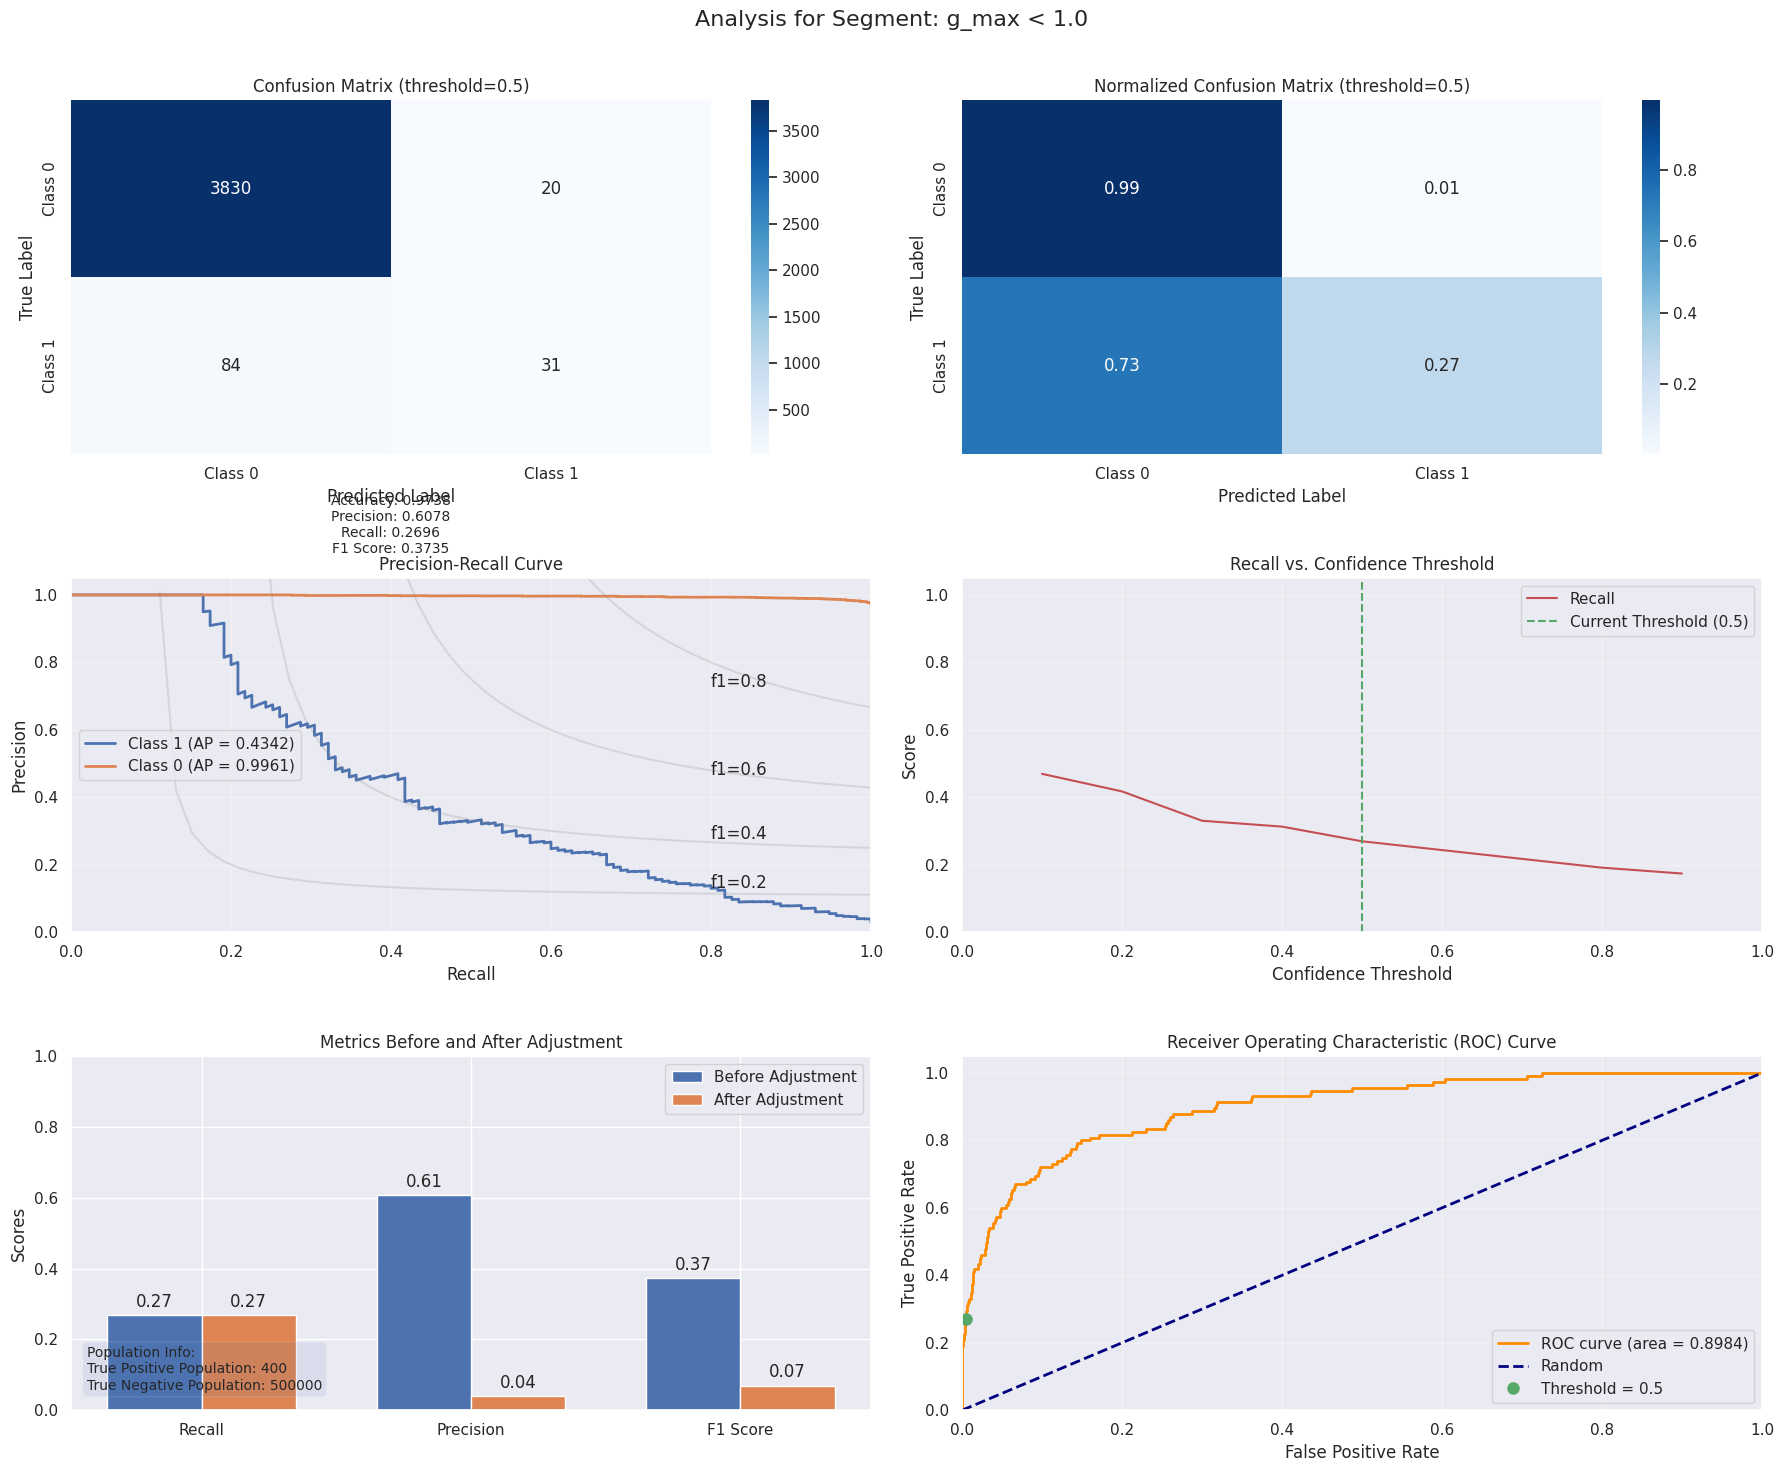


Segment: g_max < 1.0
True Positive Population: 400
True Negative Population: 500000
Samples: 3965
TN: 3830
FP: 20
FN: 84
TP: 31
Recall: 0.2696
Precision: 0.6078
F1: 0.3735
ROC_AUC: 0.8984
Precision_adj: 0.0399
F1_adj: 0.0694
Pop_TP: 400
Pop_TN: 500000

=== Analyzing Segment: 1.0 ≤ g_max < 1.4 ===
Segment size: 587 samples


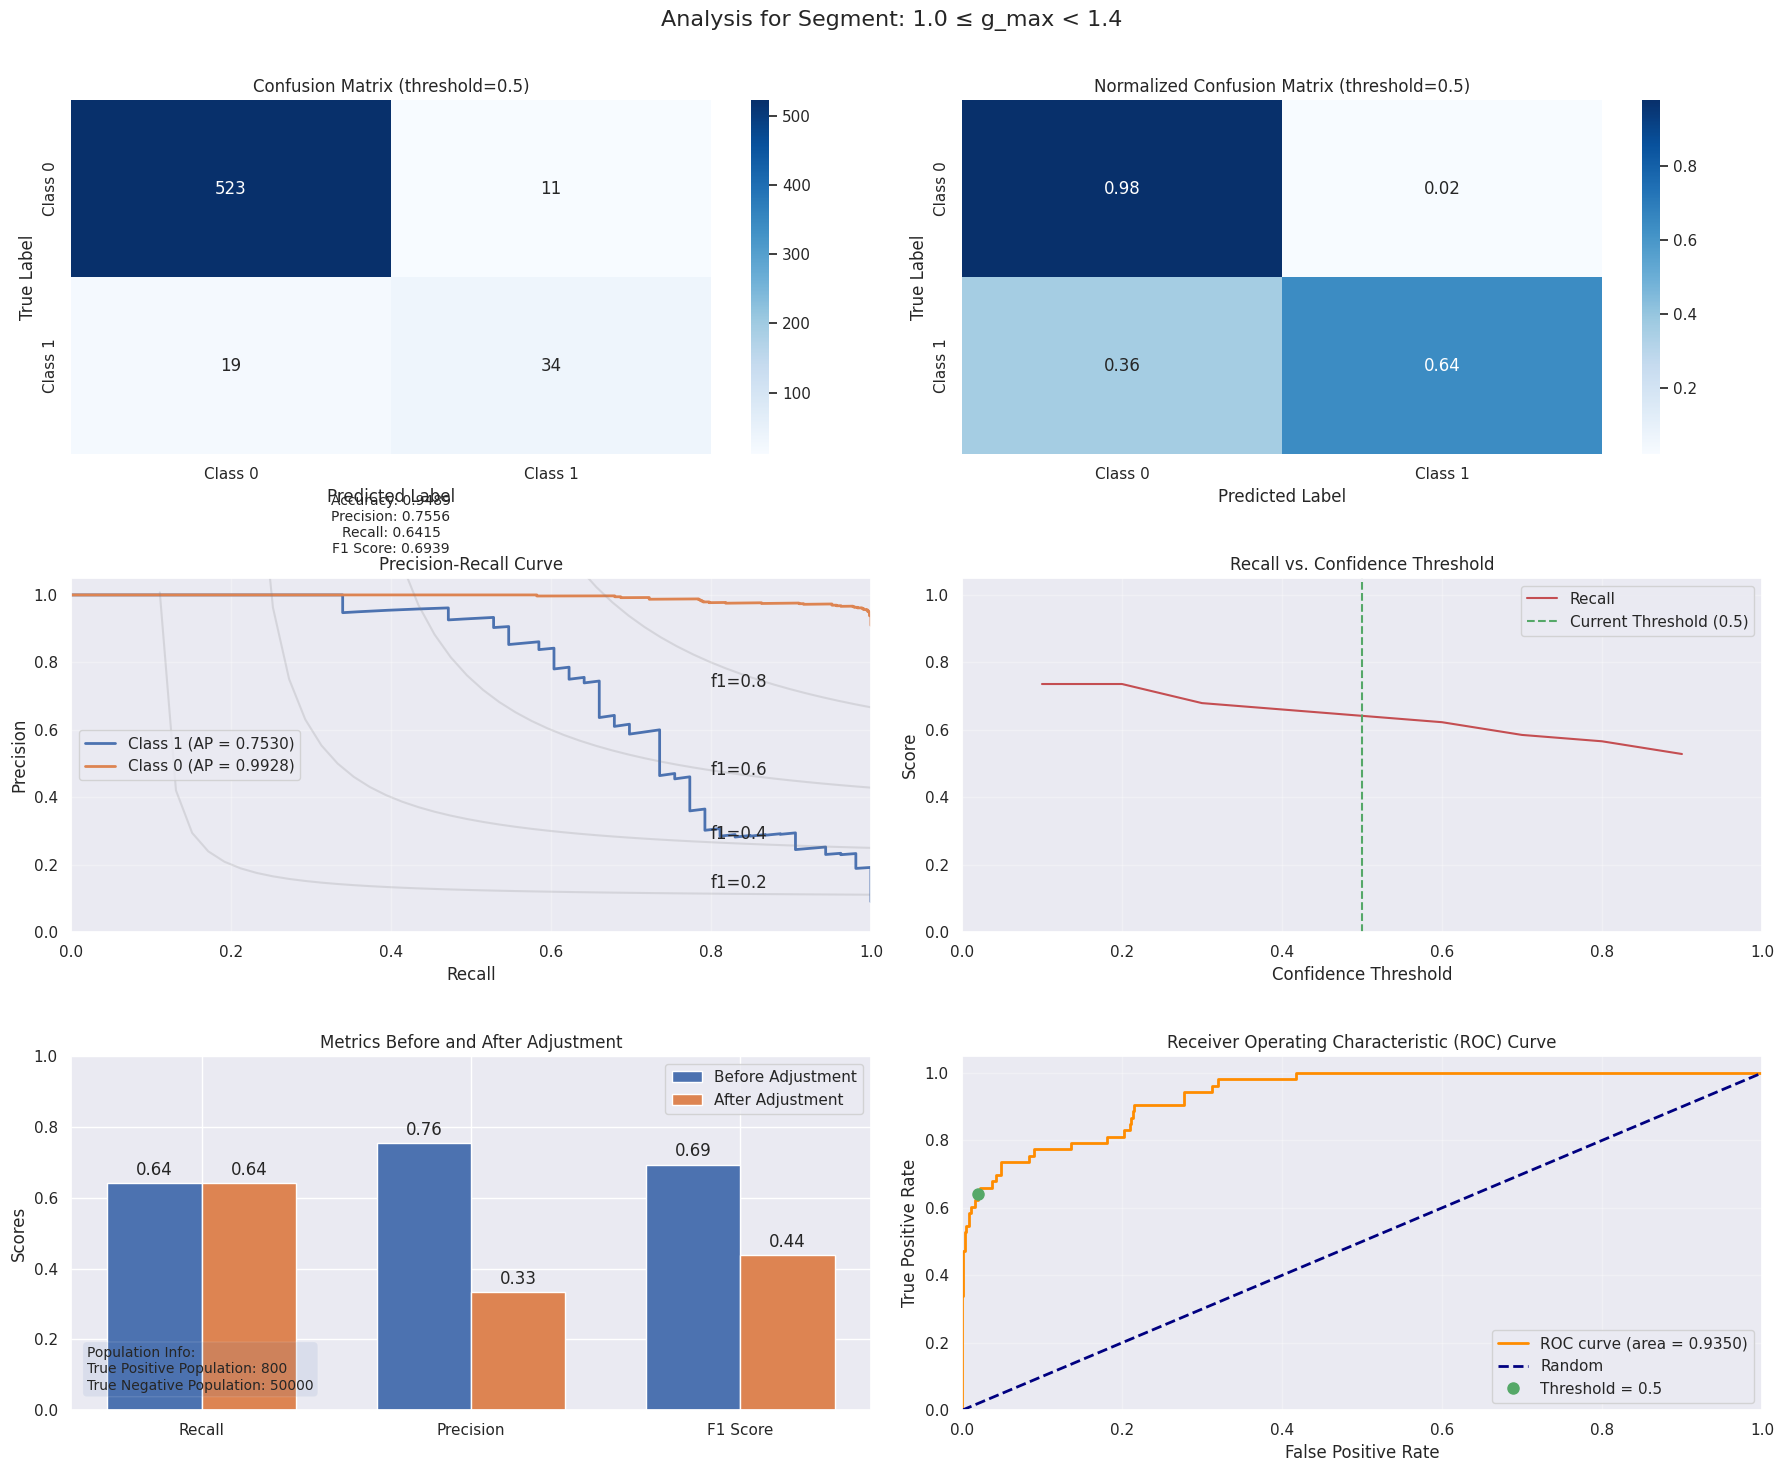


Segment: 1.0 ≤ g_max < 1.4
True Positive Population: 800
True Negative Population: 50000
Samples: 587
TN: 523
FP: 11
FN: 19
TP: 34
Recall: 0.6415
Precision: 0.7556
F1: 0.6939
ROC_AUC: 0.9350
Precision_adj: 0.3326
F1_adj: 0.4380
Pop_TP: 800
Pop_TN: 50000

=== Analyzing Segment: g_max ≥ 1.4 ===
Segment size: 376 samples


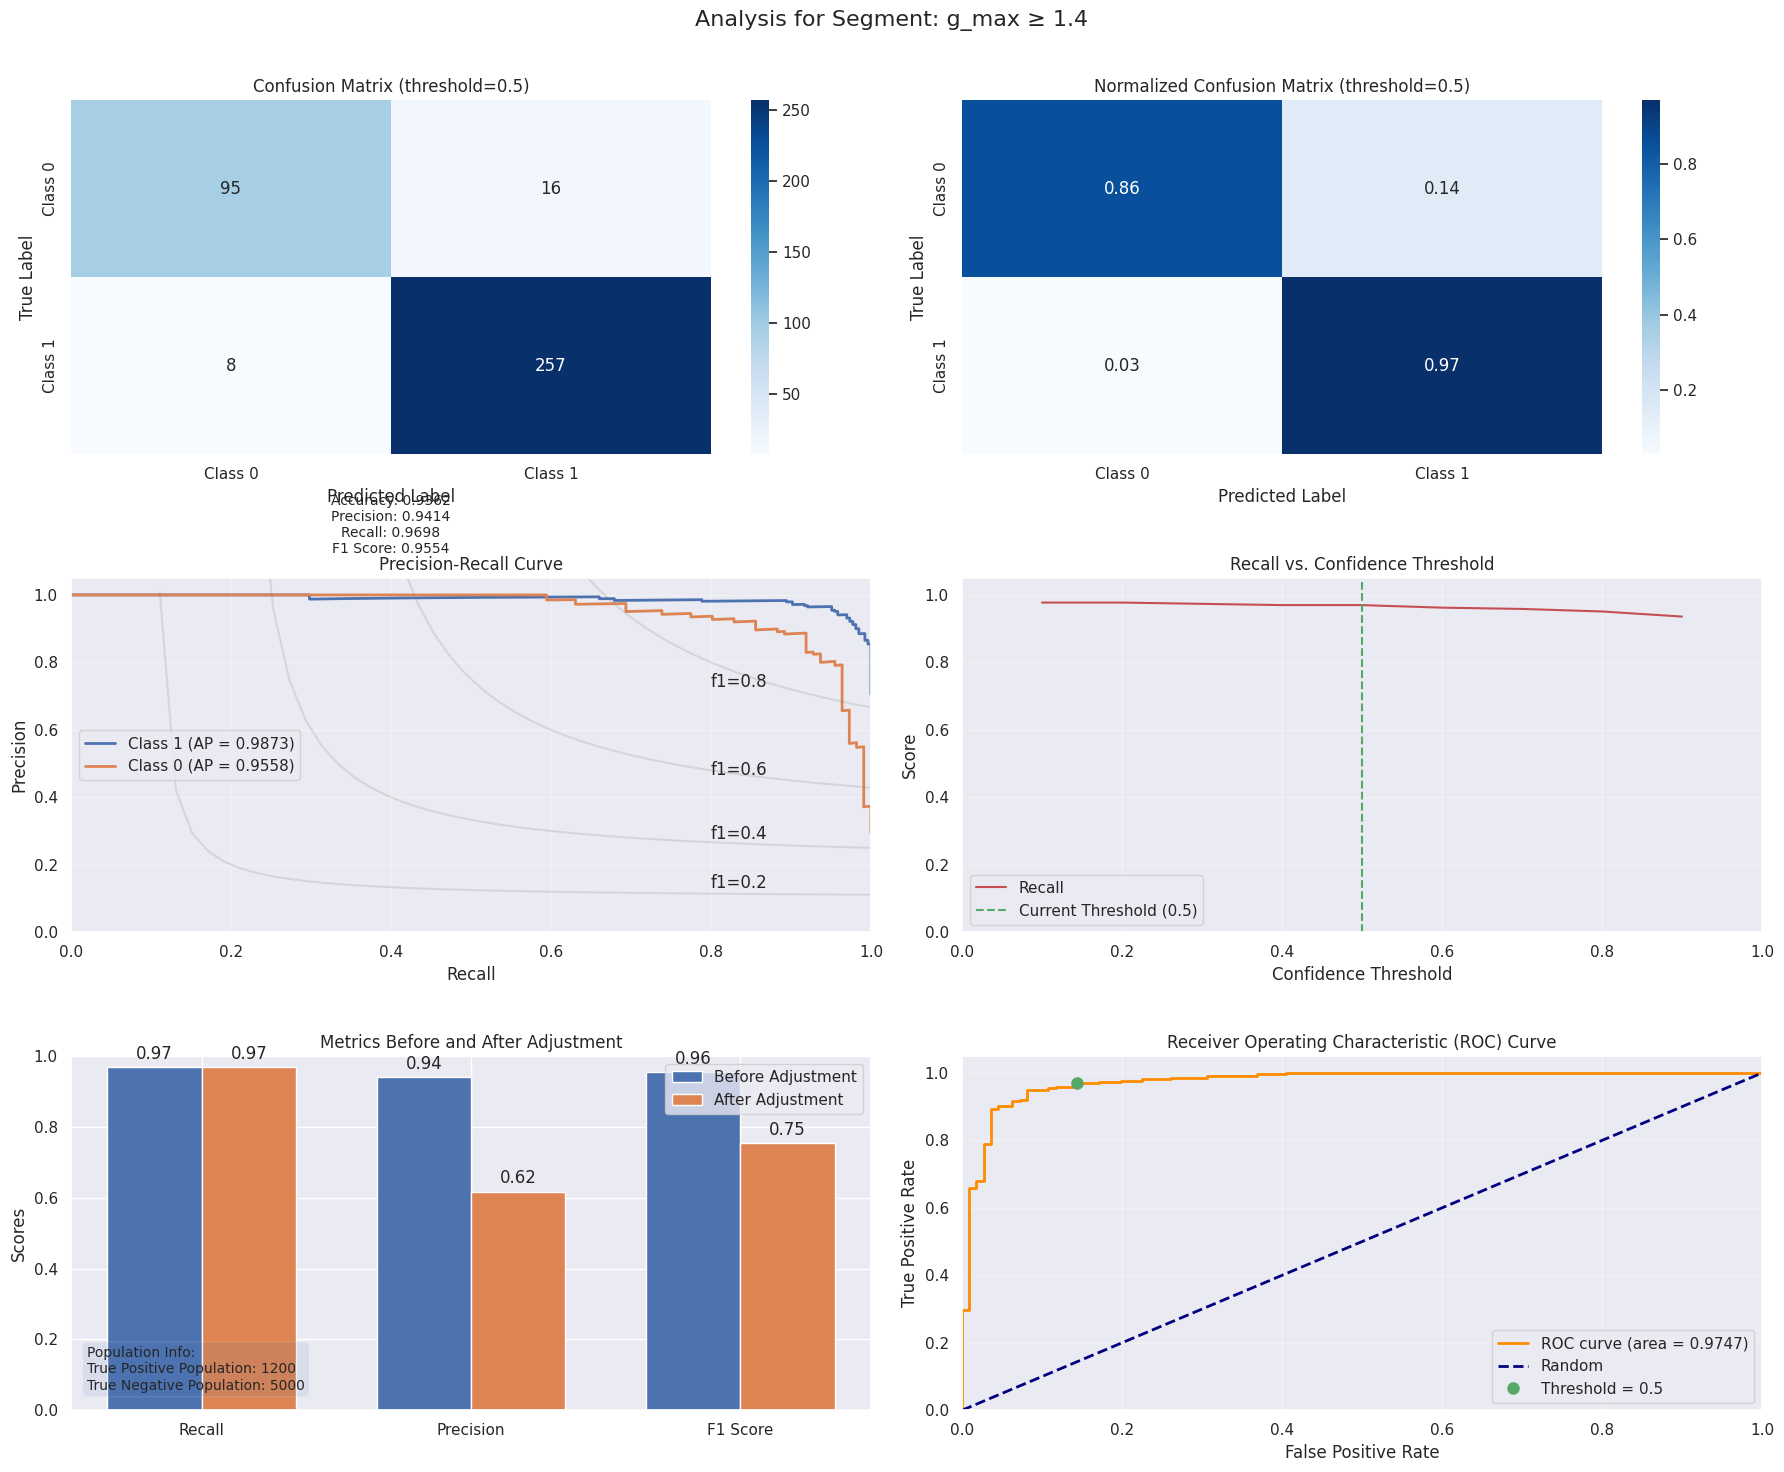


Segment: g_max ≥ 1.4
True Positive Population: 1200
True Negative Population: 5000
Samples: 376
TN: 95
FP: 16
FN: 8
TP: 257
Recall: 0.9698
Precision: 0.9414
F1: 0.9554
ROC_AUC: 0.9747
Precision_adj: 0.6176
F1_adj: 0.7546
Pop_TP: 1200
Pop_TN: 5000


 99%|===================| 4885/4928 [00:18<00:00]          

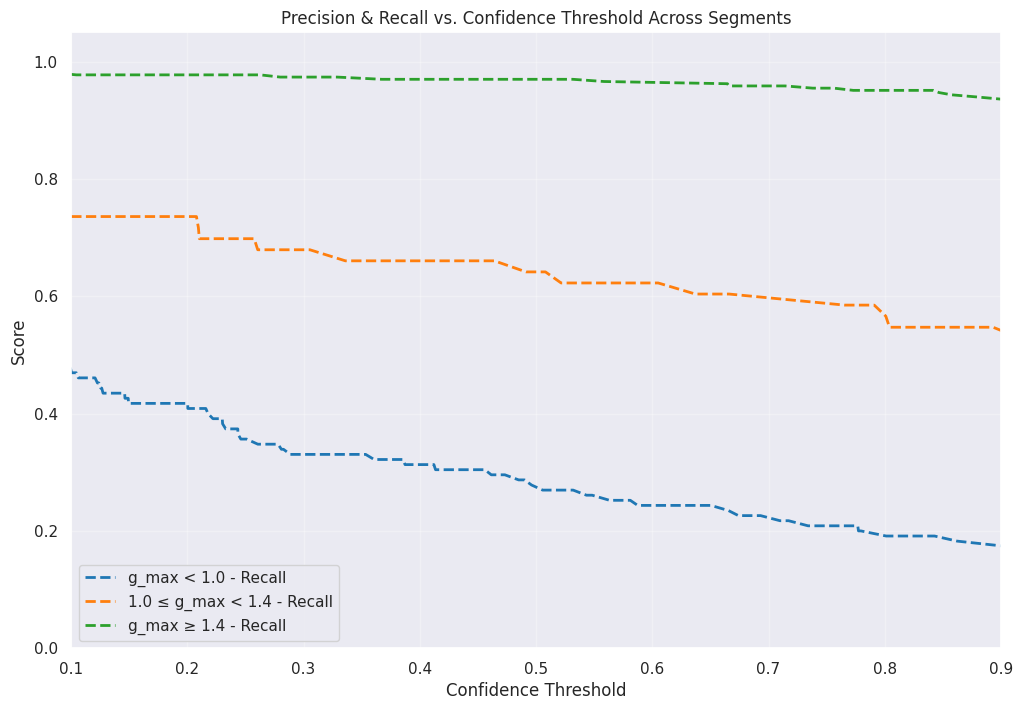

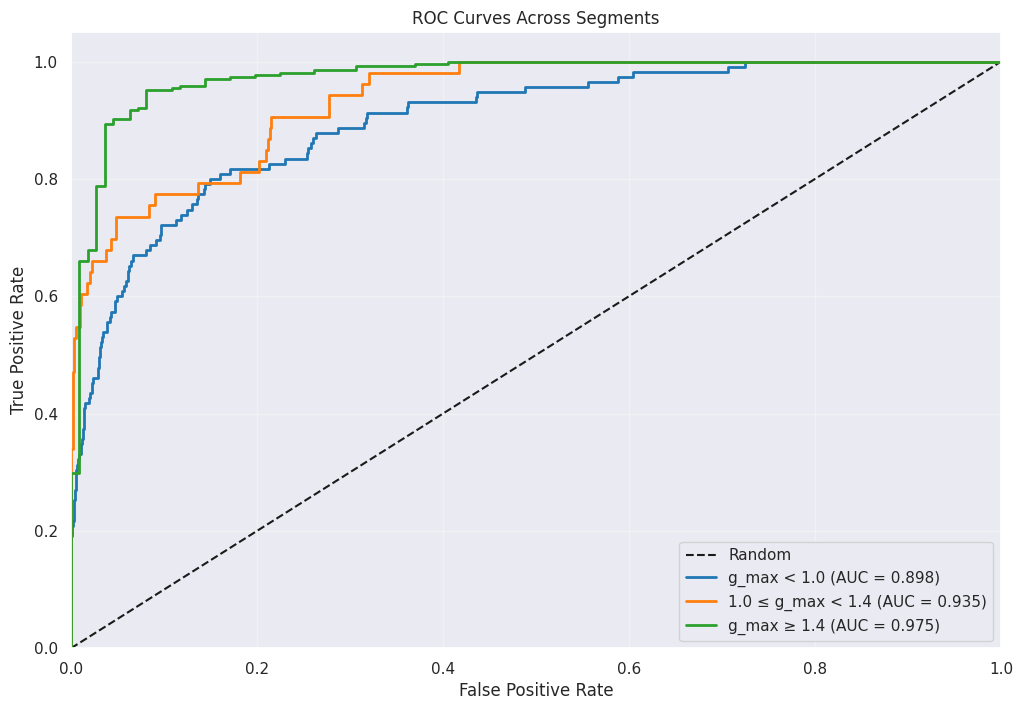

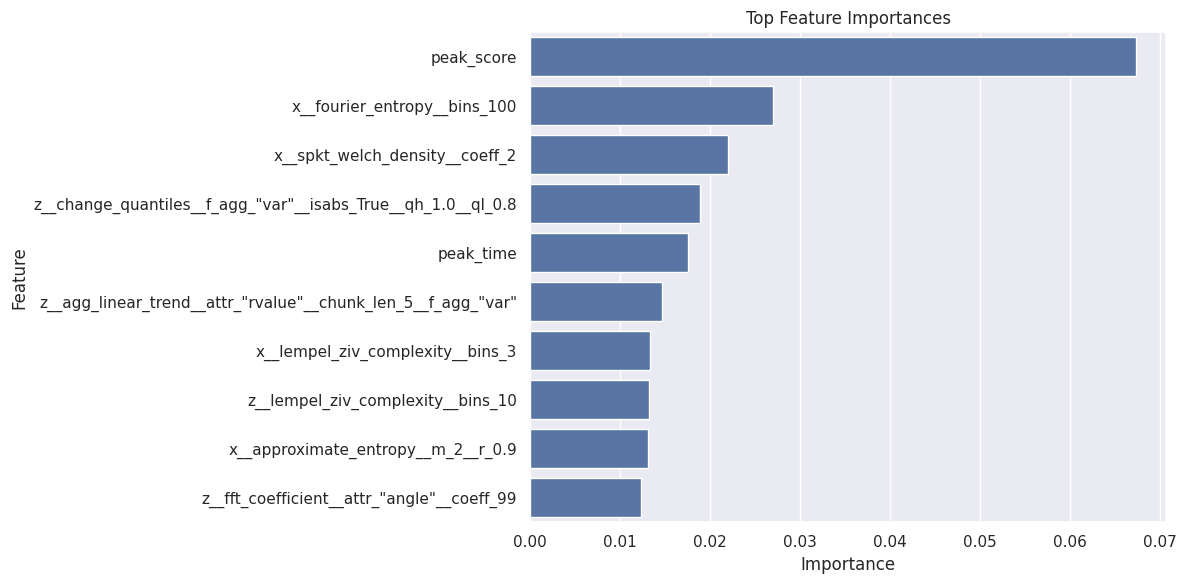

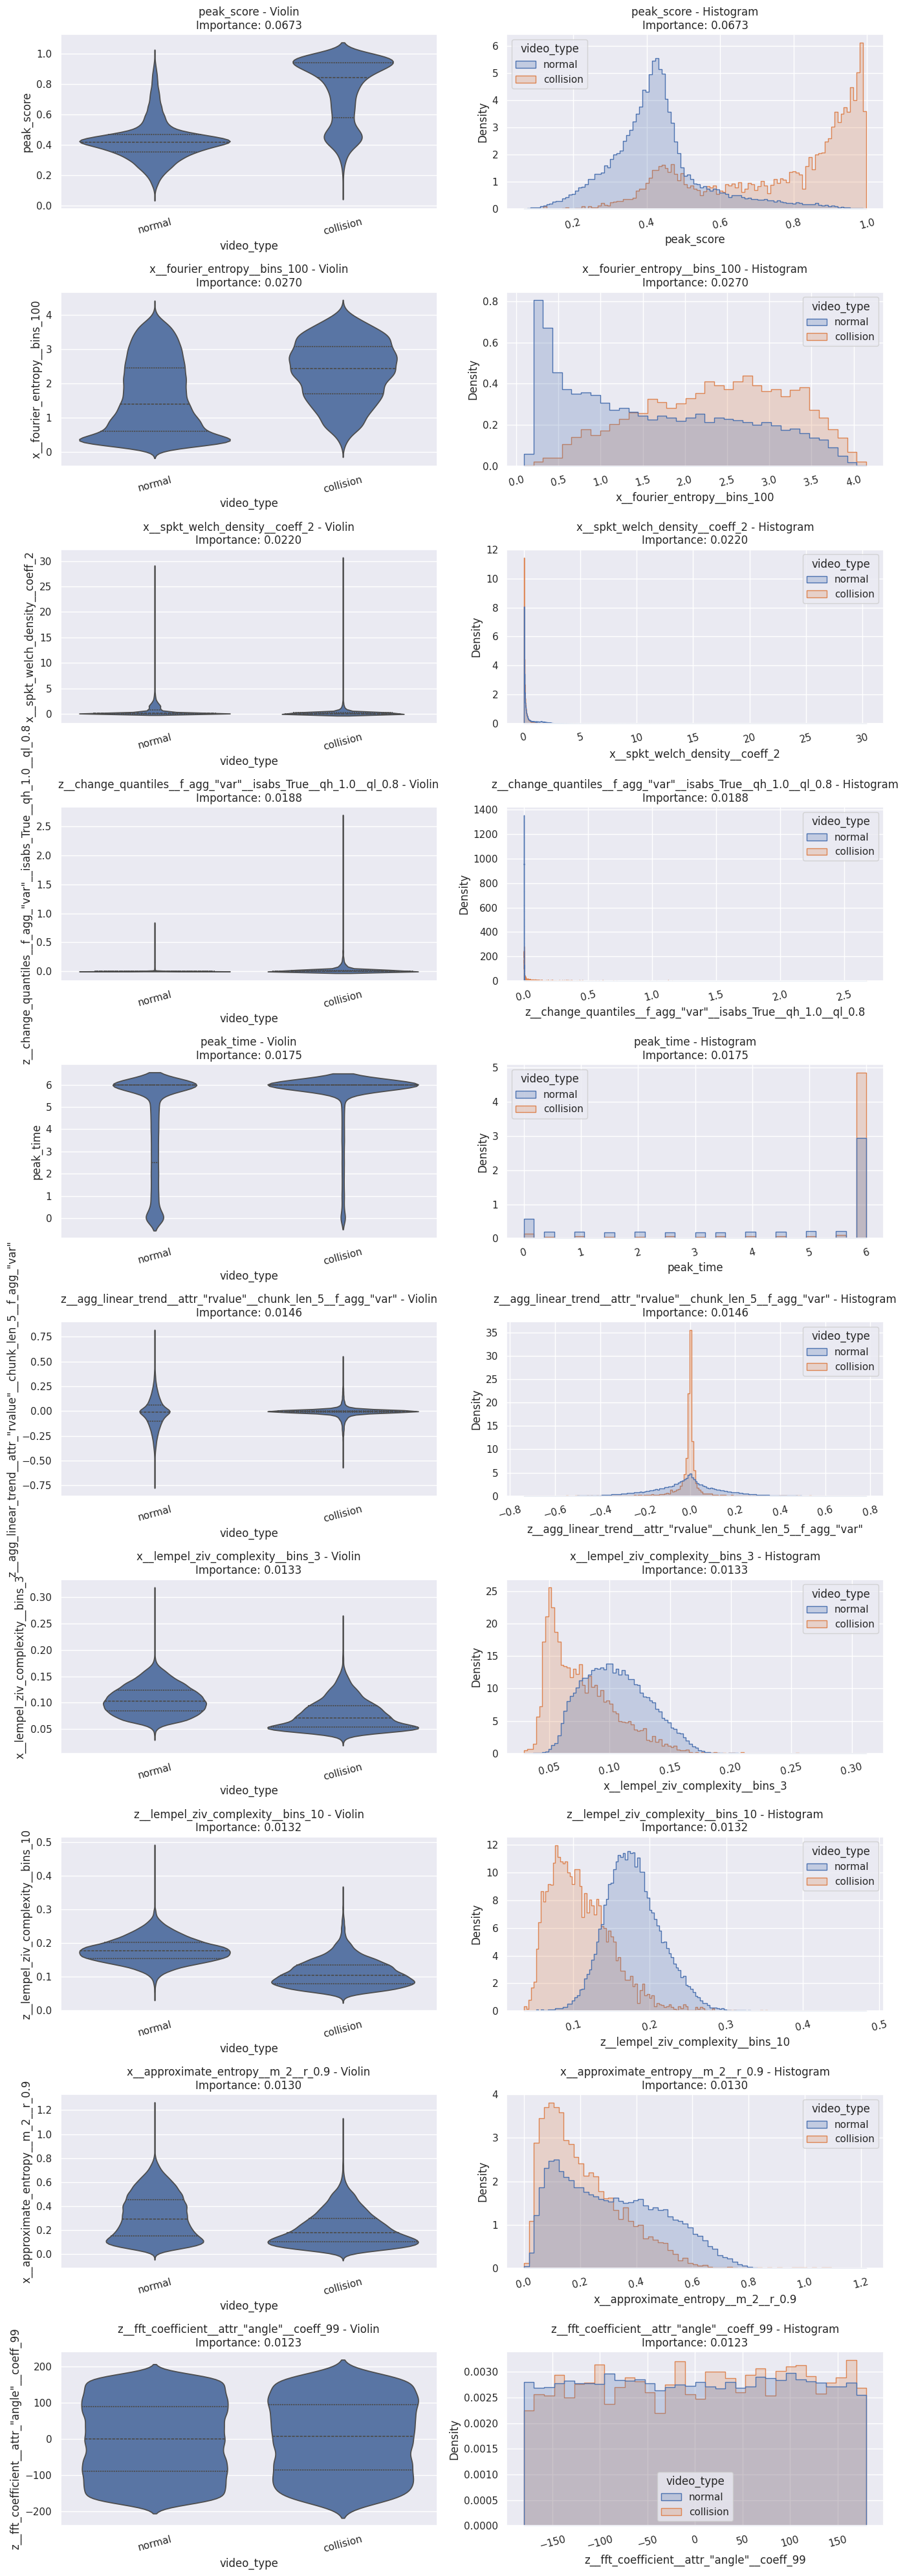

In [65]:
df_imu_audio_imp = df_imu_audio[imp_imu_audio + ['collision_label']]

exp_mang, data_manager = train_binary_tabular_model(df_imu_audio_imp, 'collision_label', train_ids, test_ids)
best_model_imu_audio = exp_mang.get_best_model()
X_val, y_val = data_manager.get_validation_data()

y_pred = best_model_imu_audio.model.predict(X_val)
y_prob = best_model_imu_audio.model.predict_proba(X_val)
preds = pd.DataFrame({
    'id': X_val.index,
    'y_pred': y_pred,
    'y_true': y_val,
    'y_prob_0': y_prob[:, 0],
    'y_prob_1': y_prob[:, 1]
})

summary_df, (metrics_fig, pop_fig, data_points_imu_audio) = analyze_by_segment(preds, meta_df)

interp = TabularInterpreterBinaryClassification(
    model=best_model_imu_audio,
    data_manager=data_manager,
    opt_metric=exp_mang.opt_metric,
    pos_class={'pos_class': 1},
    shap_timeout=300
)
fi = interp.get_feature_importance().sort_values('feature_importance_vals', ascending=False)
plot_top_features(fi[fi['feature_importance_vals'] > 0], df_imu_audio_imp, meta_df)
imp_imu_audio = fi[fi['feature_importance_vals'] > 0.0015]['col_name'].to_list()

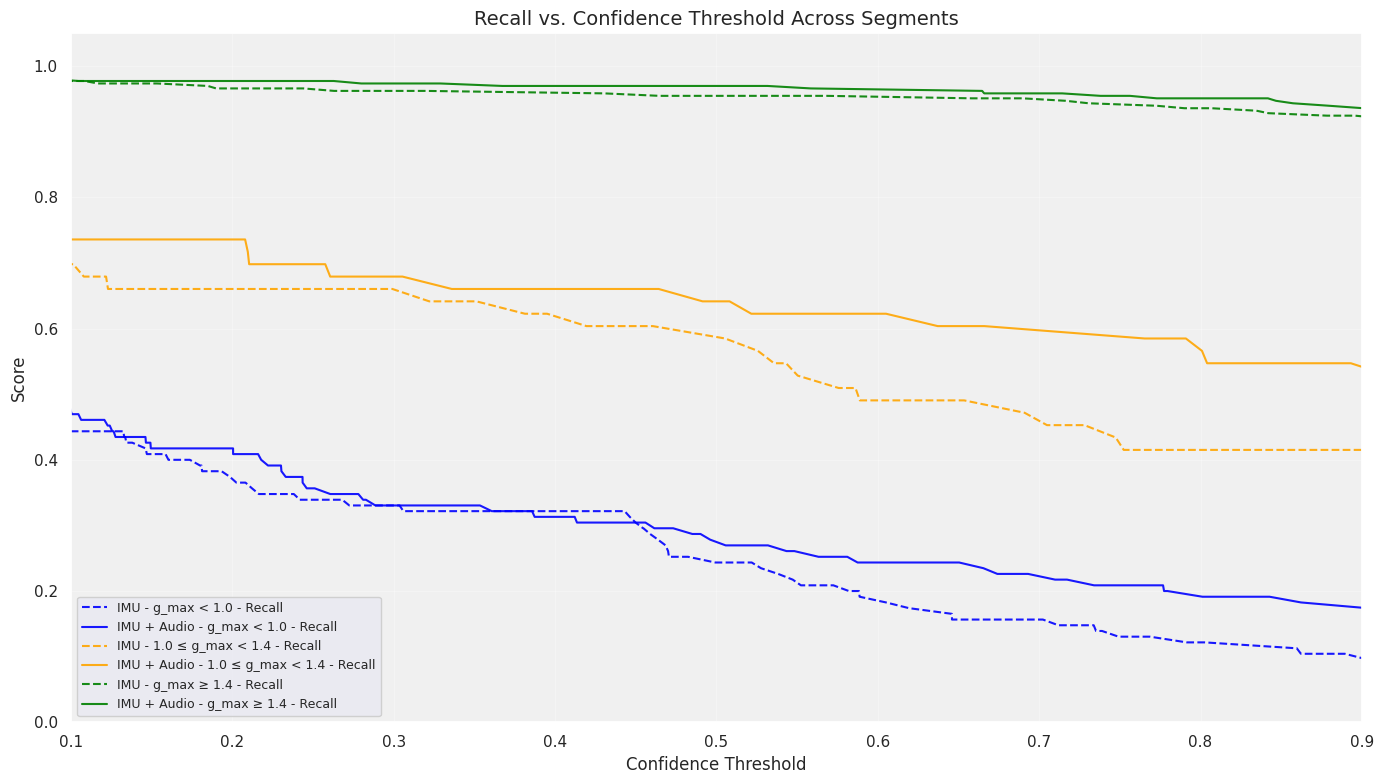

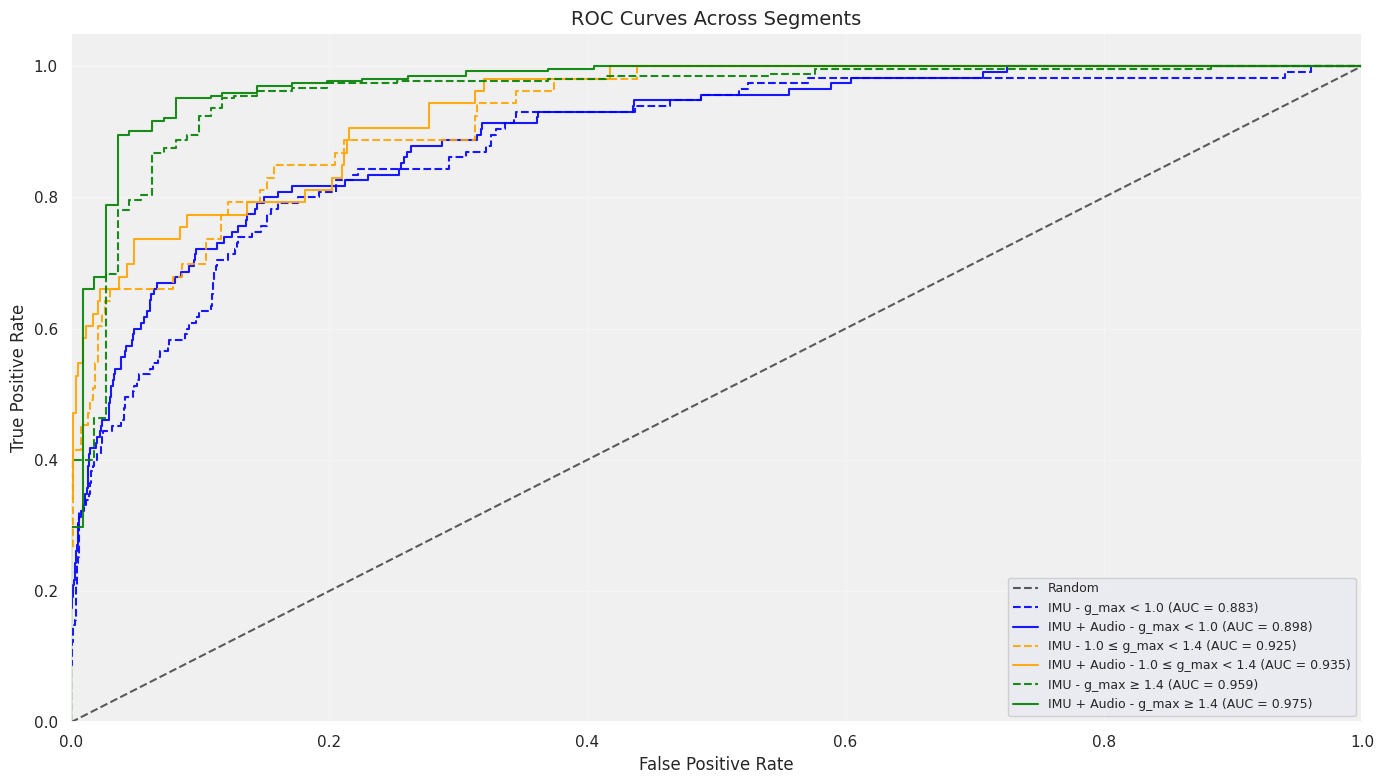

In [100]:
all_data = {
    "IMU": data_points_imu,
    "IMU + Audio": data_points_imu_audio
}

# Plot metrics
fig, axes = plot_metrics(all_data, output_filename="metrics_comparison.png")
plt.show()

# + Vision

In [83]:
df_vision = pd.read_csv('features_vision.csv', index_col = [0])
df_imu_vision = features.reset_index().merge(df_vision.reset_index(), left_on="index", right_on="index", how="inner").set_index('index')

train_ids = pd.read_csv('df_train_collision.csv').id
test_ids = pd.read_csv('df_test_collision.csv').id
train_ids = train_ids[train_ids.isin(df_imu_vision.index)]
test_ids = test_ids[test_ids.isin(df_imu_vision.index)]
len(train_ids), len(test_ids)

(44043, 6718)

In [93]:
df_imu_vision

z__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8  \
index                                                                                                     
000049dd8b9406d24fb225d3cac9cbcf                                                               0.000976   
000147cc5fca05f5b9b7992981190242                                                               0.001597   
0001beb8085197d17d48a1ea461c86d3                                                               0.000282   
0001ee227361e6ea1c9534a1d4e10415                                                               0.000528   
00025101c58e65246dbd3dd615e2ef14                                                               0.000358   
...                                                                                                 ...   
incident-ff722998c23c82cbafa75a3ccee00e6a                                                      0.006804   
incident-ff86cca08315a28687ee31c206f478ec                                                      0.003832   
incident-ffa036a6848105d12434196e1df3b88c                                                      0.085523   
incident-ffbe349d3461d3ed7c9b6c0221270a79                                                      0.031816   
incident-fff753450b3a9e0abb9cea89e5800728                                                      0.050237   

                                           z__absolute_maximum  \
index                                                            
000049dd8b9406d24fb225d3cac9cbcf                      0.838020   
000147cc5fca05f5b9b7992981190242                      0.624625   
0001beb8085197d17d48a1ea461c86d3                      0.452703   
0001ee227361e6ea1c9534a1d4e10415                      0.606324   
00025101c58e65246dbd3dd615e2ef14                      0.656129   
...                                                        ...   
incident-ff722998c23c82cbafa75a3ccee00e6a             1.280062   
incident-ff86cca08315a28687ee31c206f478ec             1.167844   
incident-ffa036a6848105d12434196e1df3b88c             4.145195   
incident-ffbe349d3461d3ed7c9b6c0221270a79             2.476844   
incident-fff753450b3a9e0abb9cea89e5800728             5.911000   

                                           z__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"  \
index                                                                                                     
000049dd8b9406d24fb225d3cac9cbcf                                                               0.087636   
000147cc5fca05f5b9b7992981190242                                                              -0.312065   
0001beb8085197d17d48a1ea461c86d3                                                              -0.142321   
0001ee227361e6ea1c9534a1d4e10415                                                              -0.147835   
00025101c58e65246dbd3dd615e2ef14                                                              -0.091897   
...                                                                                                 ...   
incident-ff722998c23c82cbafa75a3ccee00e6a                                                     -0.003476   
incident-ff86cca08315a28687ee31c206f478ec                                                      0.031053   
incident-ffa036a6848105d12434196e1df3b88c                                                      0.003472   
incident-ffbe349d3461d3ed7c9b6c0221270a79                                                      0.000444   
incident-fff753450b3a9e0abb9cea89e5800728                                                      0.004901   

                                           x__lempel_ziv_complexity__bins_3  \
index                                                                         
000049dd8b9406d24fb225d3cac9cbcf                                   0.131814   
000147cc5fca05f5b9b7992981190242                                   0.078358   
0001beb8085197d17d48a1ea461c86d3                                   0.075510   
0001e

In [88]:
exp_mang, data_manager = train_binary_tabular_model(df_imu_vision, 'collision_label', train_ids, test_ids)
best_model_imu_vision = exp_mang.get_best_model()
X_val, y_val = data_manager.get_validation_data()

ValueError: Feature shape mismatch, expected: 137, got 2449


=== Analyzing Segment: g_max < 1.0 ===
Segment size: 5609 samples


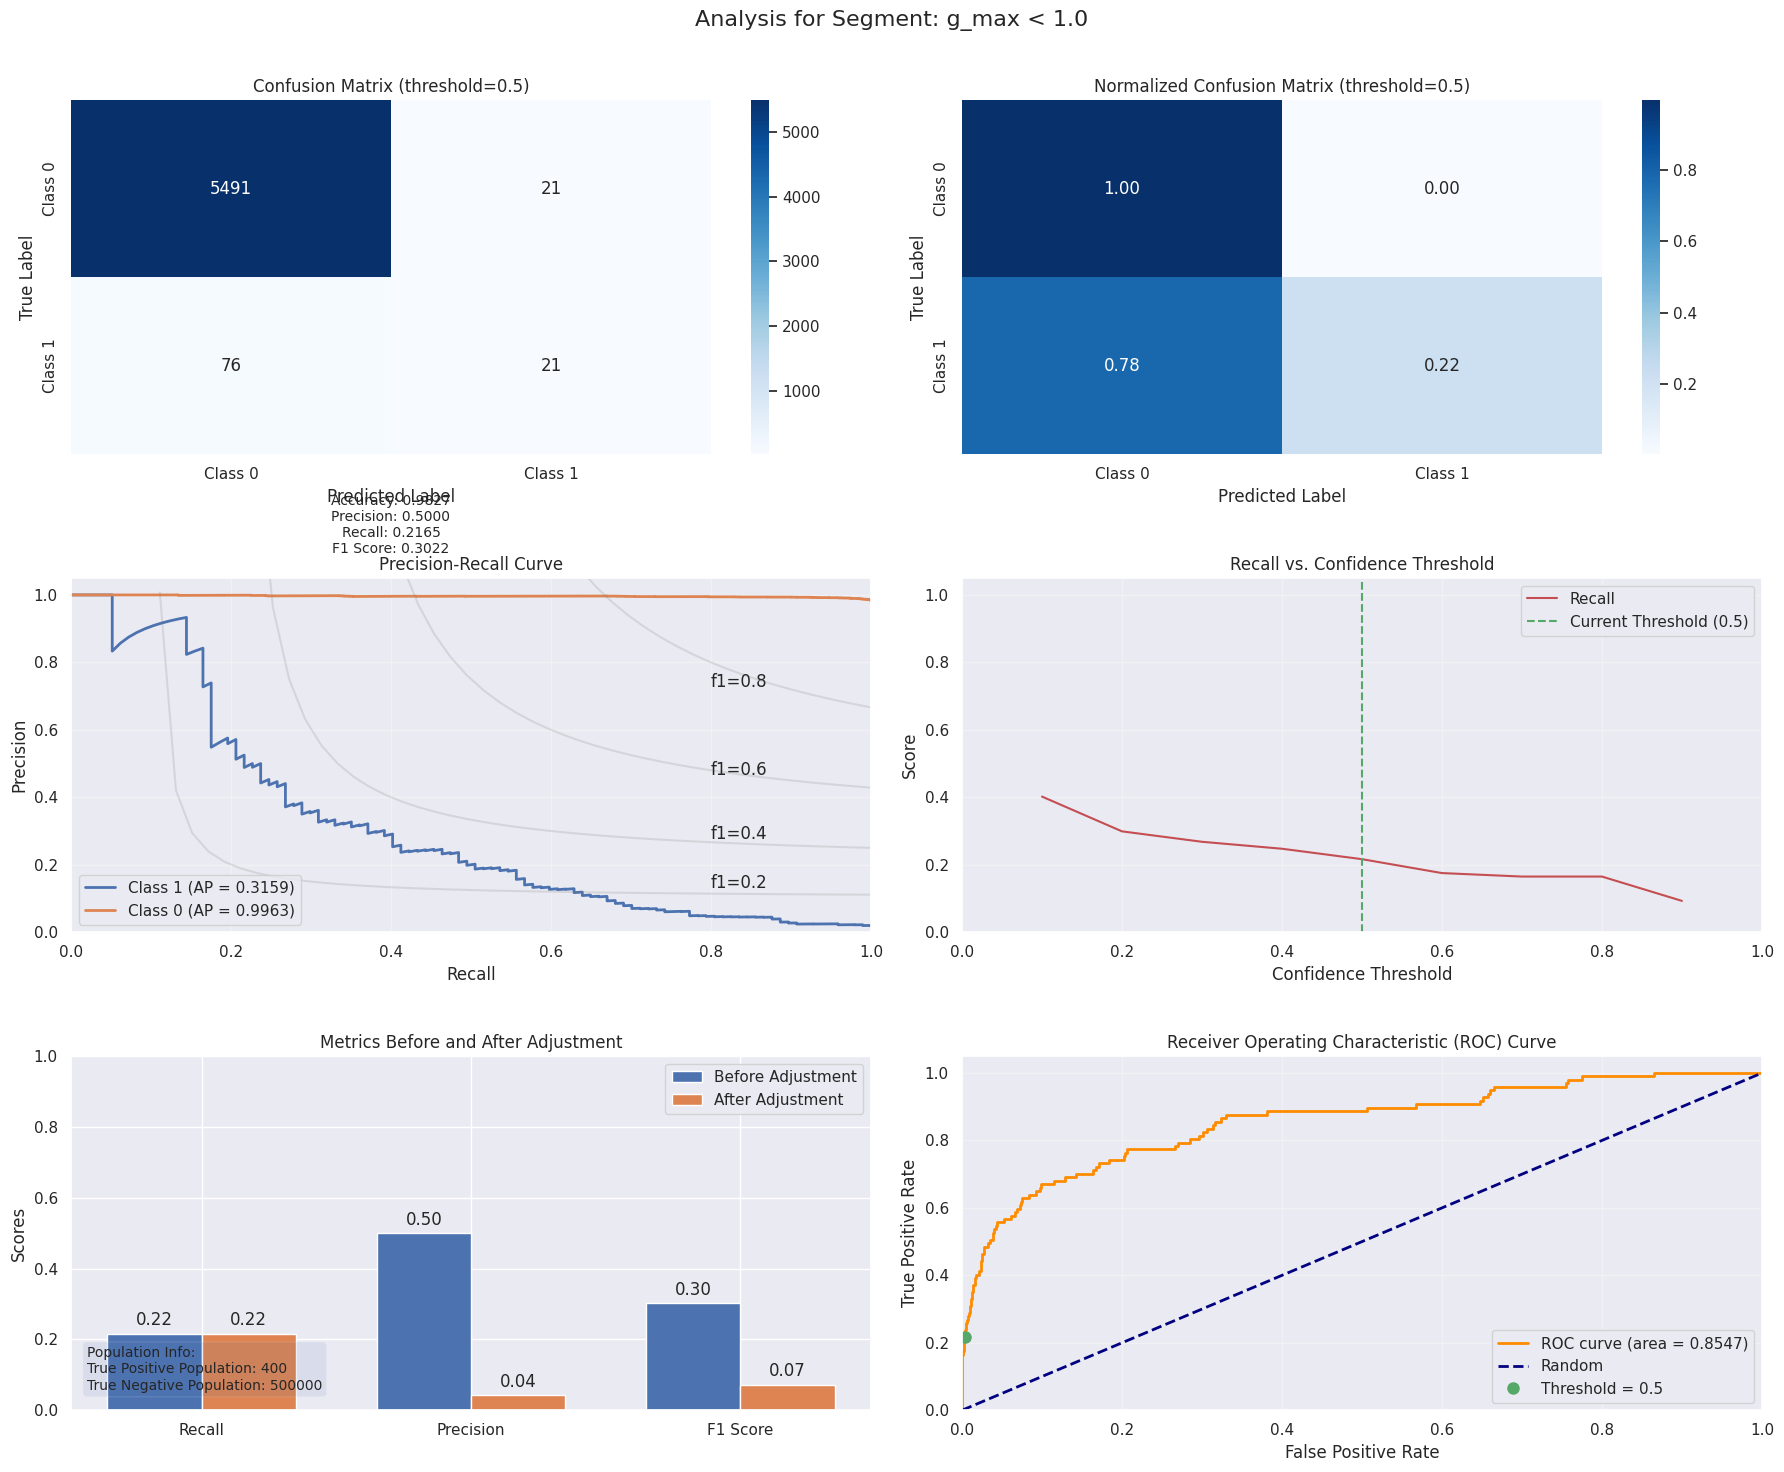


Segment: g_max < 1.0
True Positive Population: 400
True Negative Population: 500000
Samples: 5609
TN: 5491
FP: 21
FN: 76
TP: 21
Recall: 0.2165
Precision: 0.5000
F1: 0.3022
ROC_AUC: 0.8547
Precision_adj: 0.0435
F1_adj: 0.0724
Pop_TP: 400
Pop_TN: 500000

=== Analyzing Segment: 1.0 ≤ g_max < 1.4 ===
Segment size: 810 samples


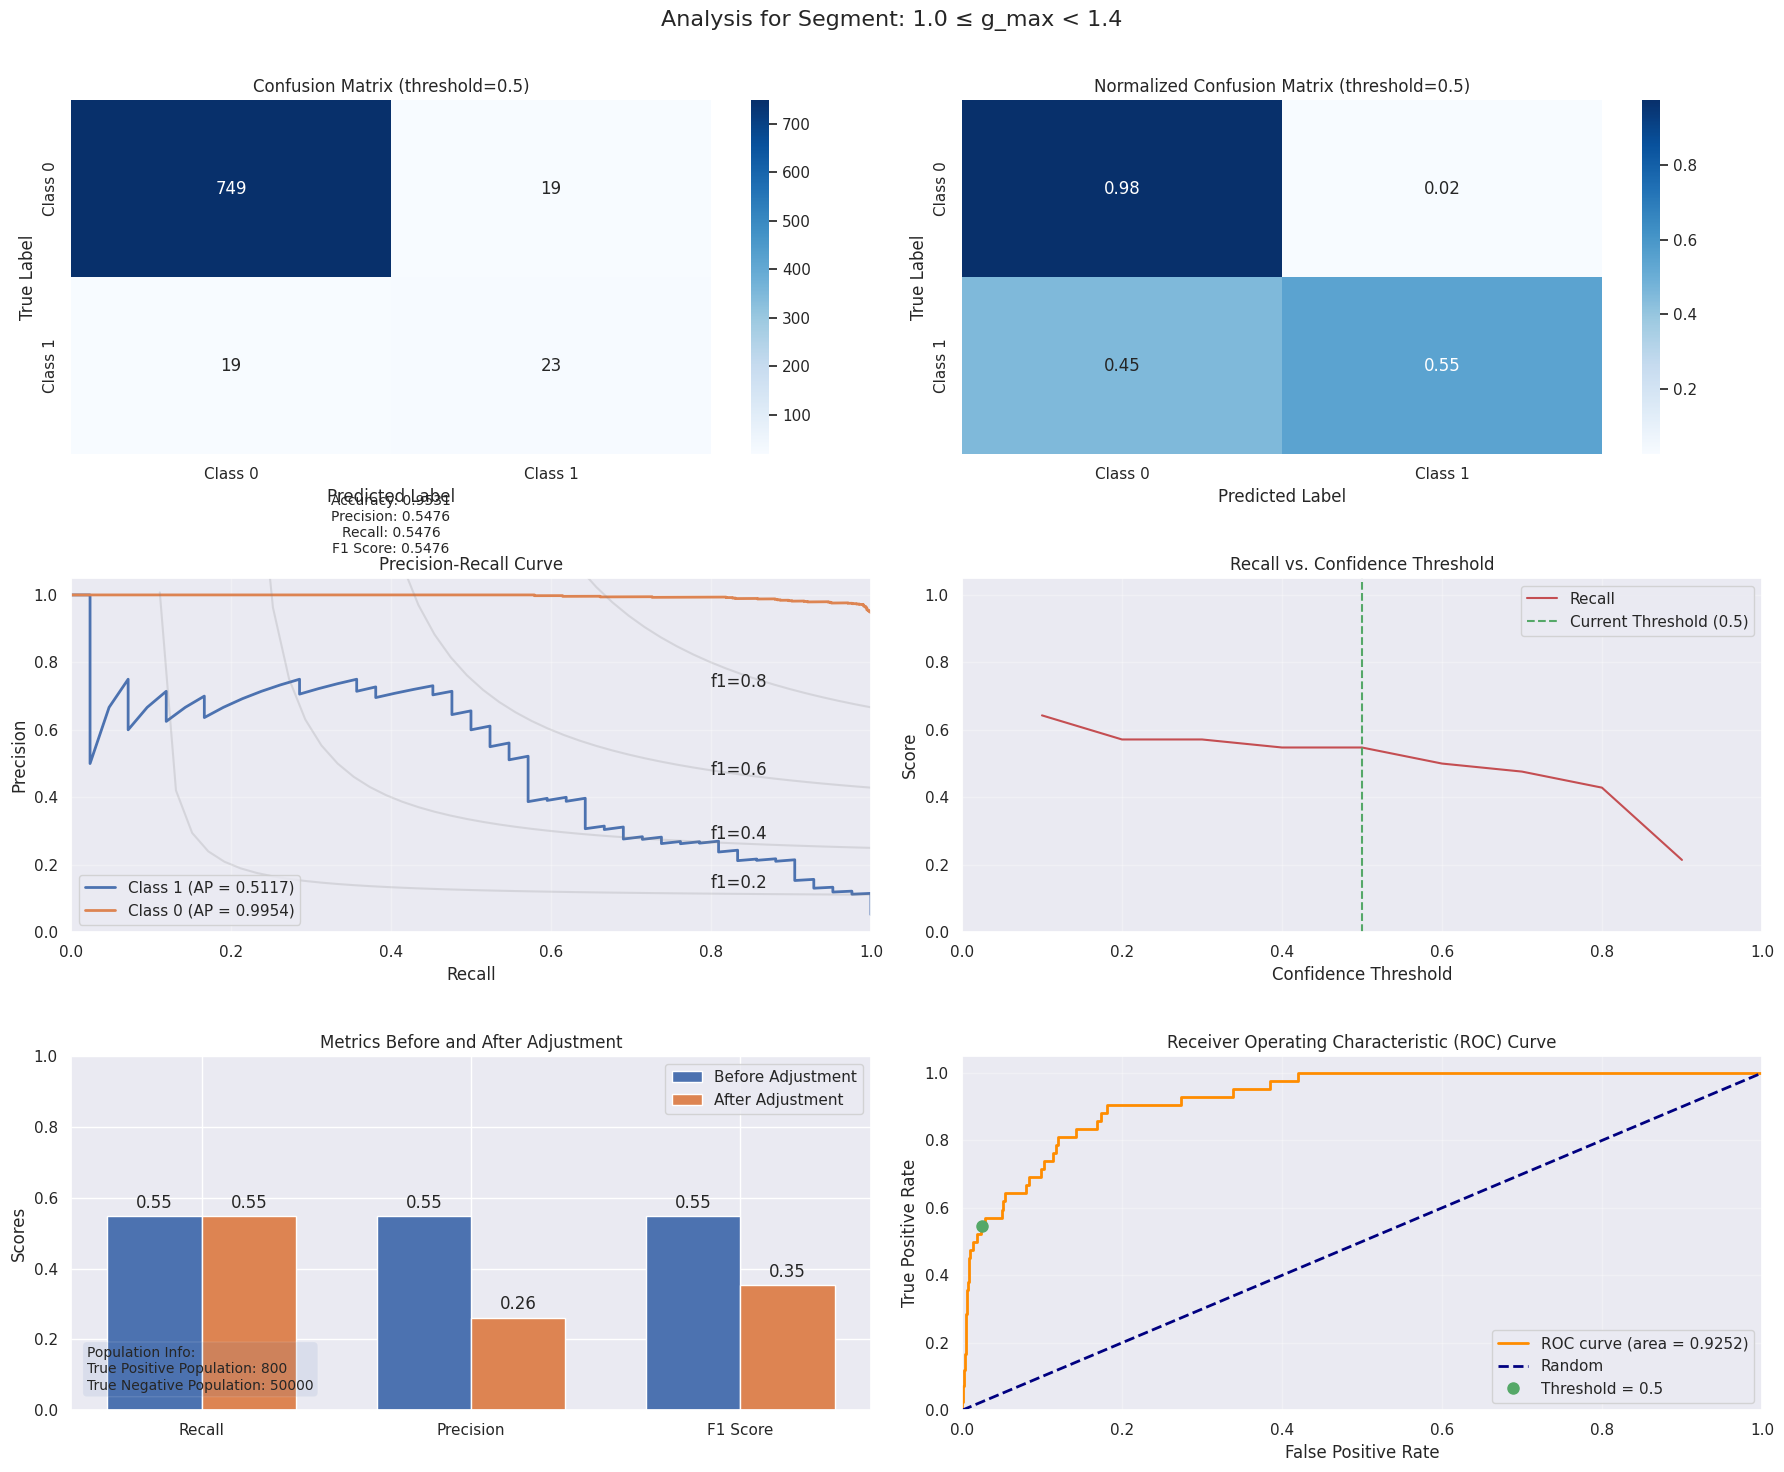


Segment: 1.0 ≤ g_max < 1.4
True Positive Population: 800
True Negative Population: 50000
Samples: 810
TN: 749
FP: 19
FN: 19
TP: 23
Recall: 0.5476
Precision: 0.5476
F1: 0.5476
ROC_AUC: 0.9252
Precision_adj: 0.2615
F1_adj: 0.3540
Pop_TP: 800
Pop_TN: 50000

=== Analyzing Segment: g_max ≥ 1.4 ===
Segment size: 299 samples


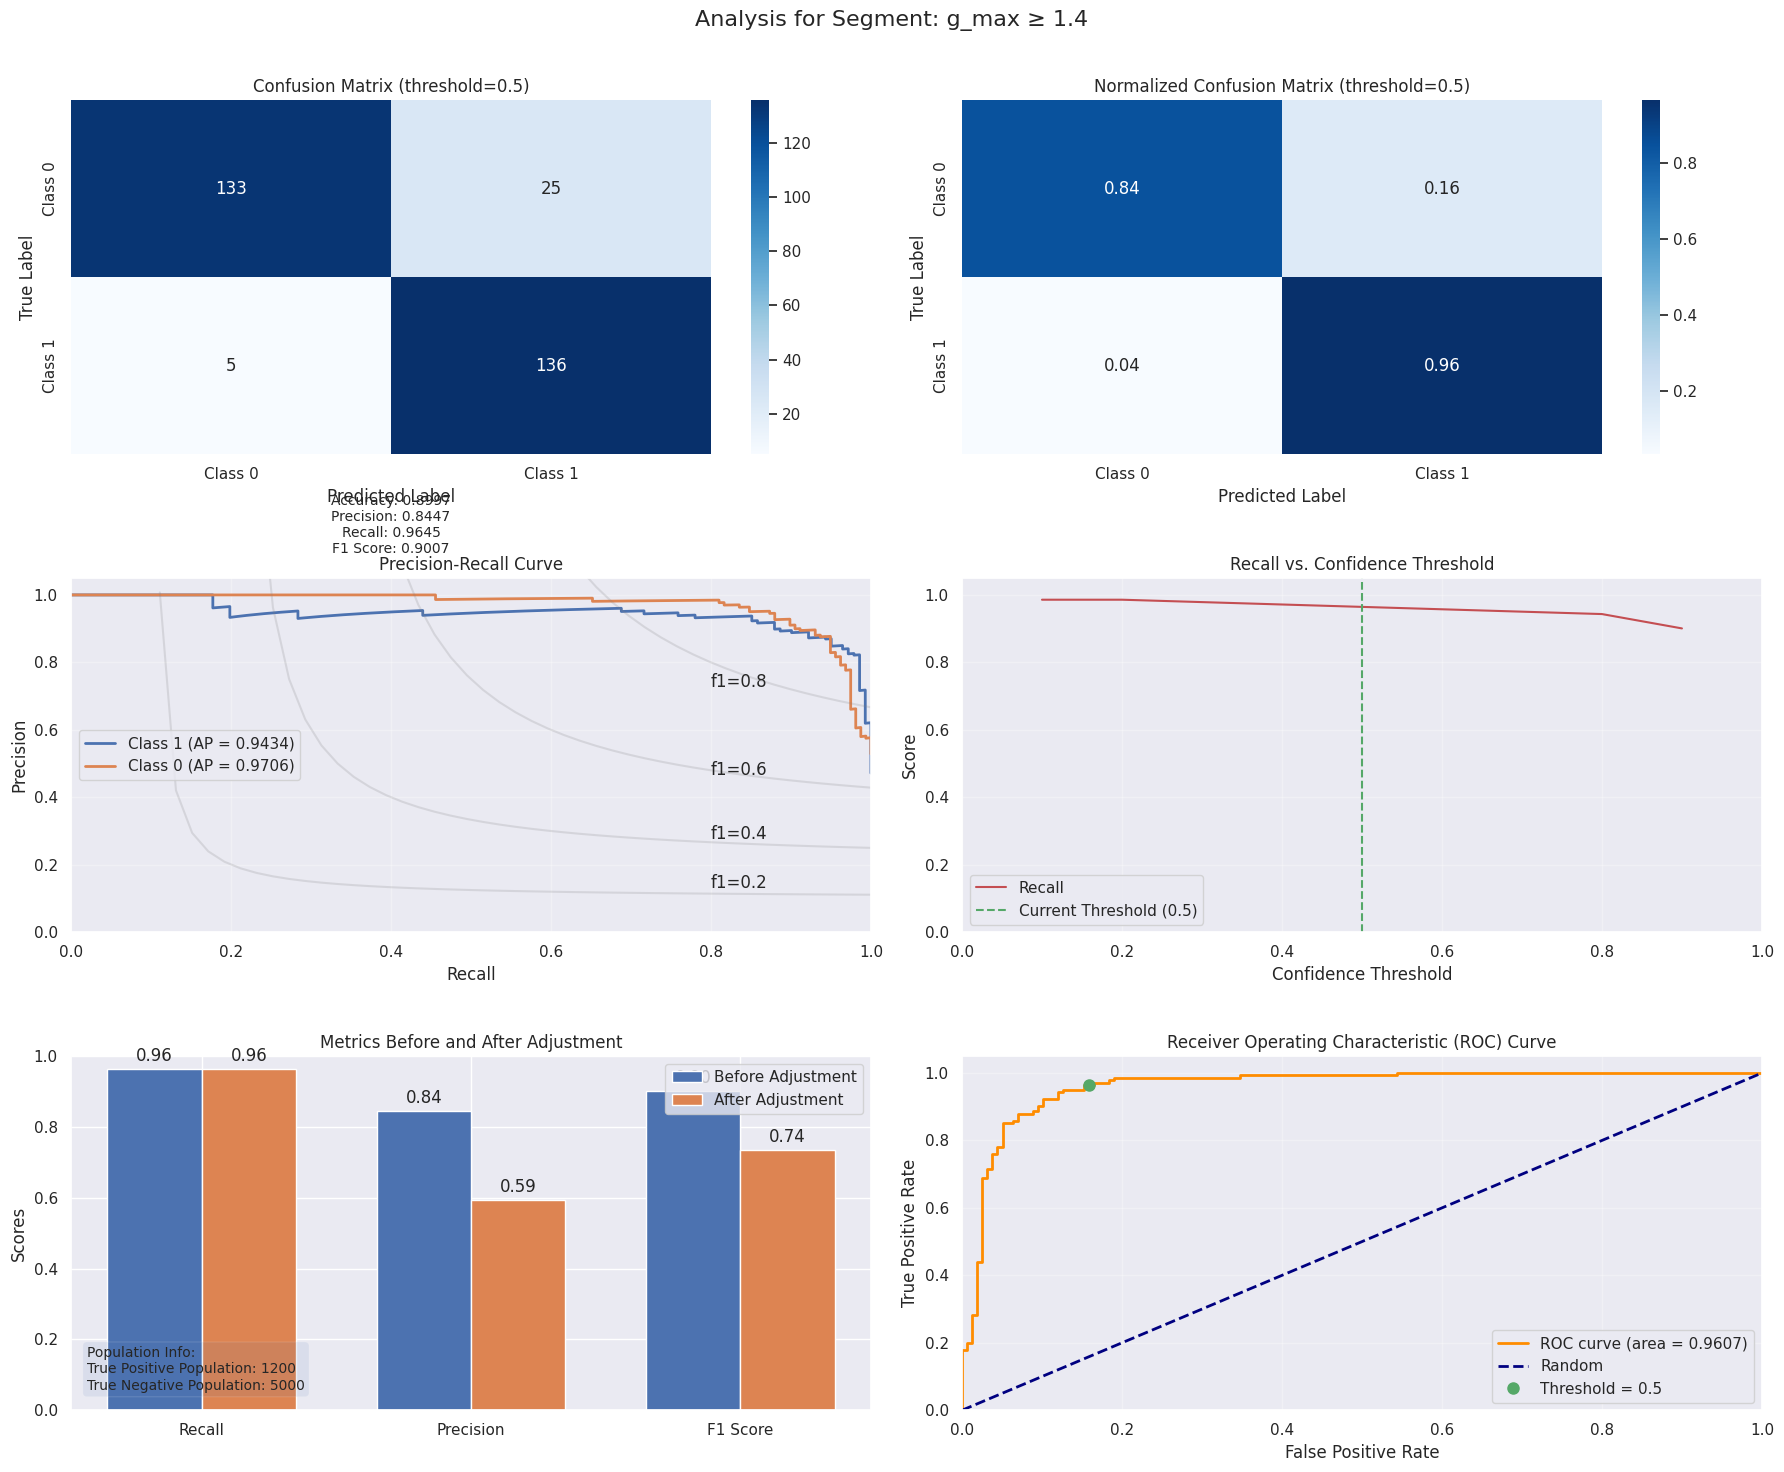


Segment: g_max ≥ 1.4
True Positive Population: 1200
True Negative Population: 5000
Samples: 299
TN: 133
FP: 25
FN: 5
TP: 136
Recall: 0.9645
Precision: 0.8447
F1: 0.9007
ROC_AUC: 0.9607
Precision_adj: 0.5940
F1_adj: 0.7352
Pop_TP: 1200
Pop_TN: 5000


 98%|===================| 6555/6718 [00:28<00:00]          

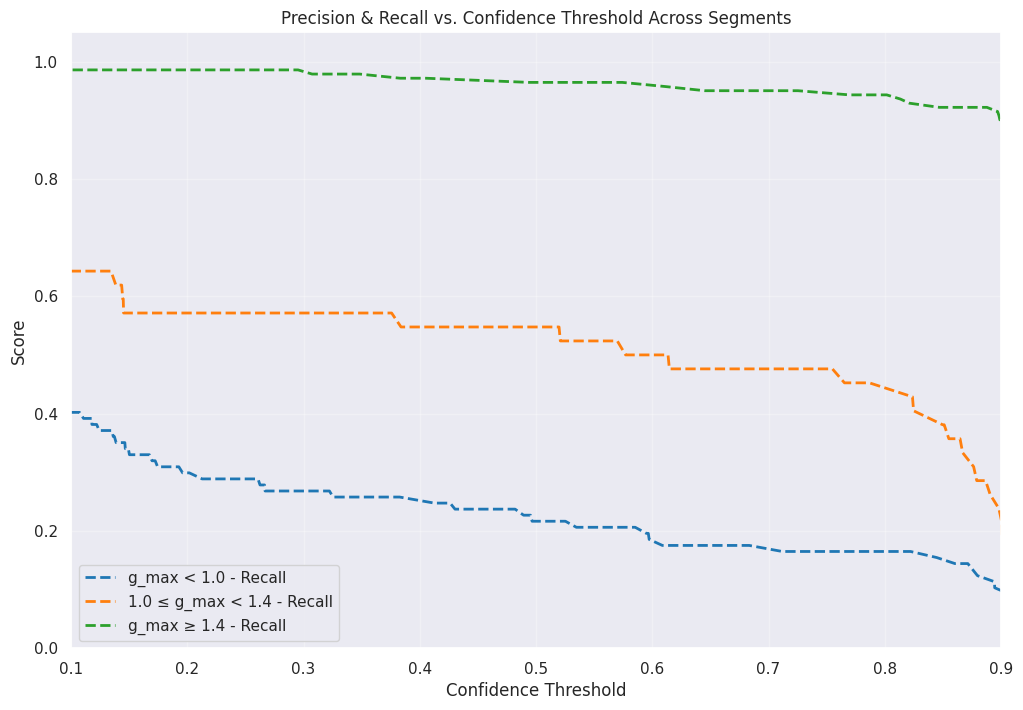

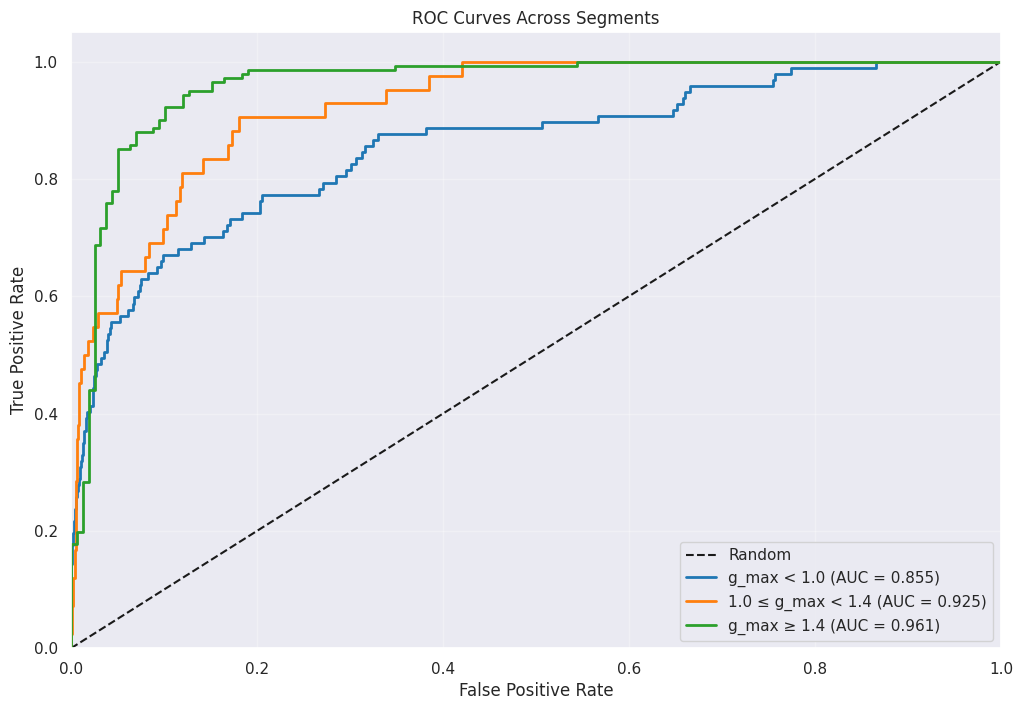

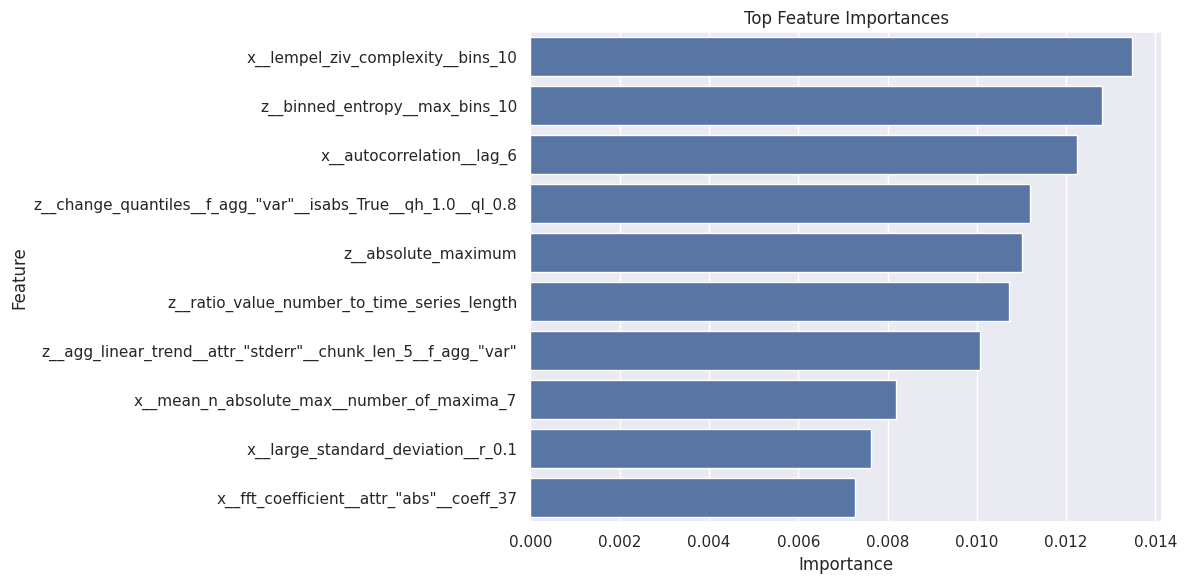

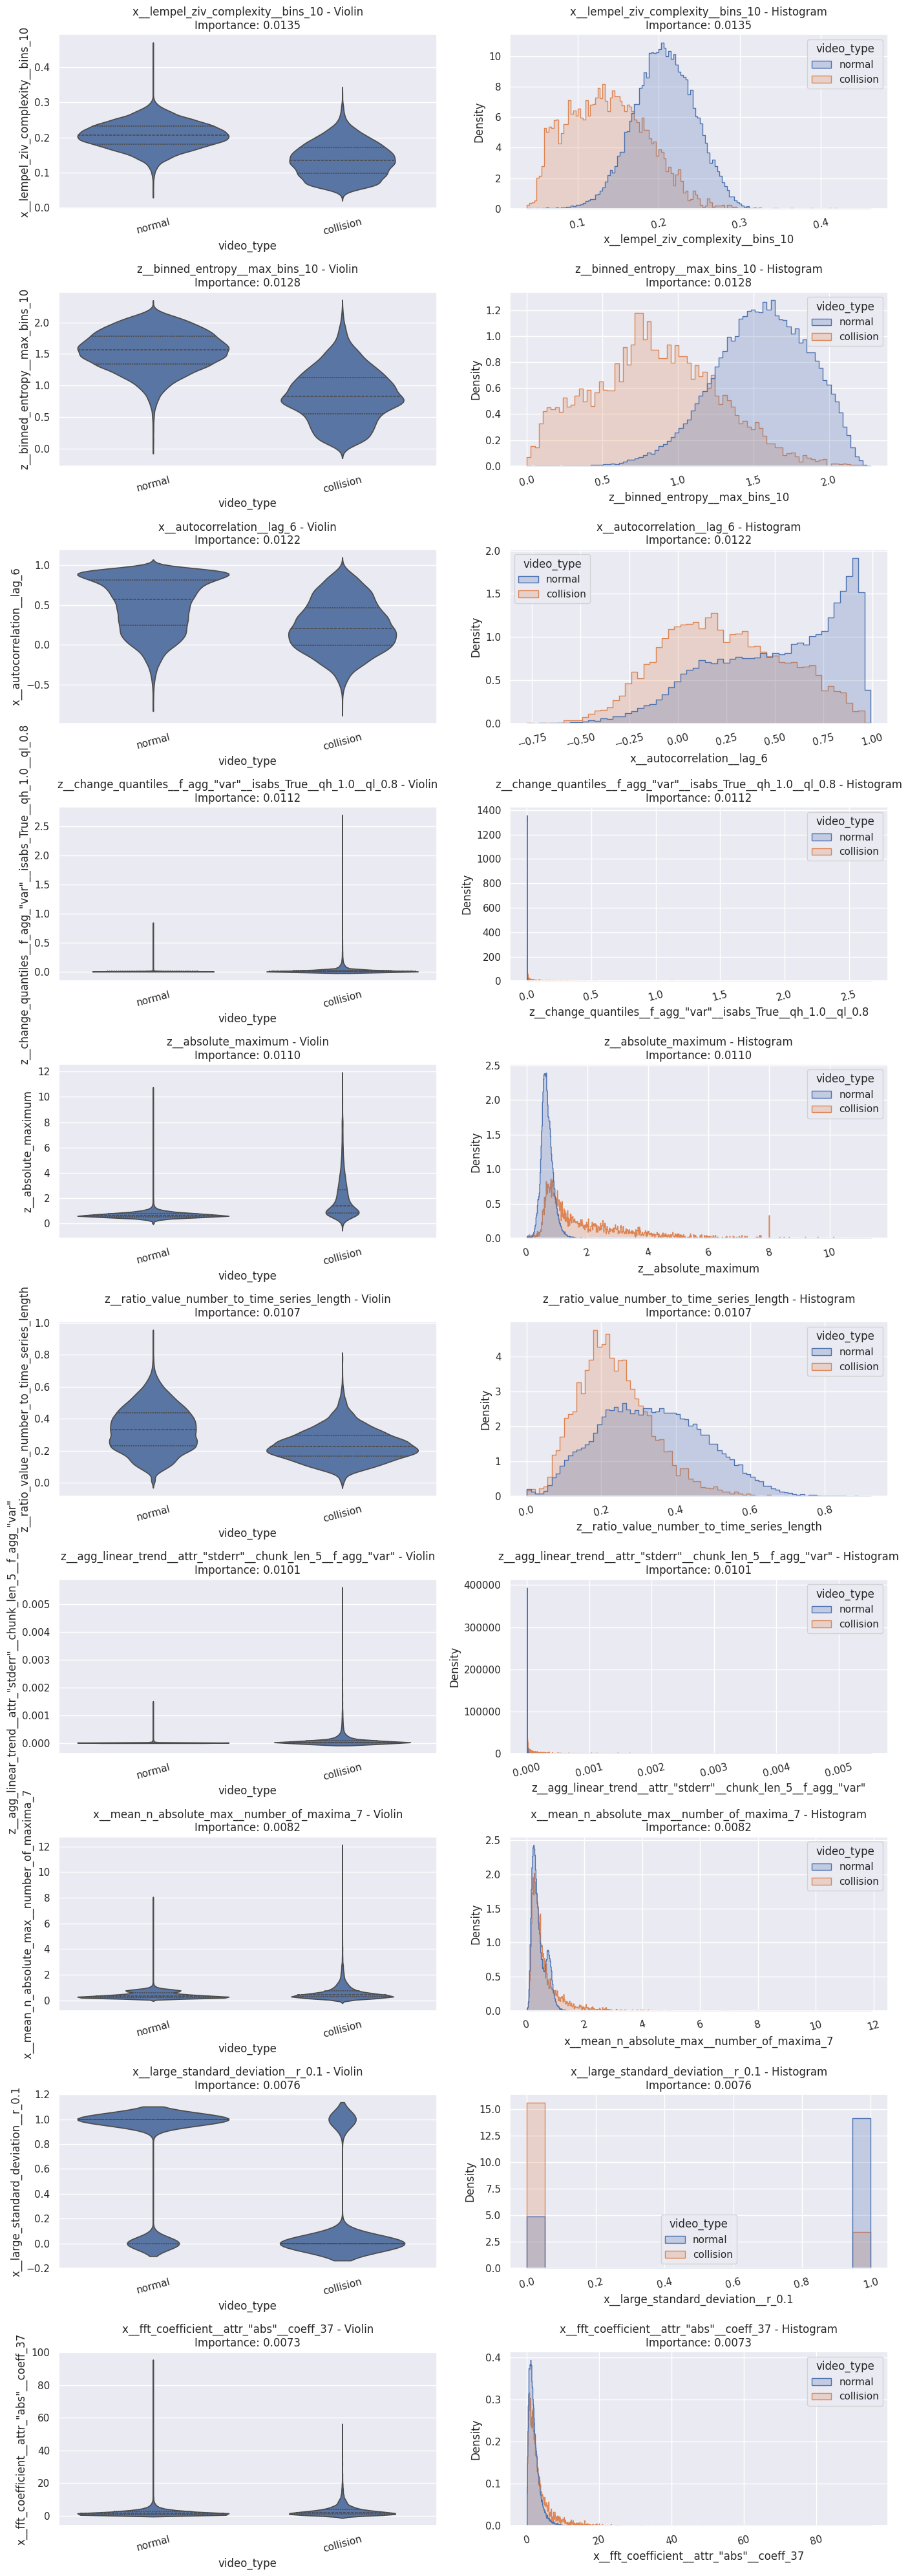

In [94]:
y_pred = best_model_imu_vision.model.predict(X_val)
y_prob = best_model_imu_vision.model.predict_proba(X_val)
preds = pd.DataFrame({
    'id': X_val.index,
    'y_pred': y_pred,
    'y_true': y_val,
    'y_prob_0': y_prob[:, 0],
    'y_prob_1': y_prob[:, 1]
})

summary_df, (metrics_fig, pop_fig, data_points_imu_vision) = analyze_by_segment(preds, meta_df)

interp = TabularInterpreterBinaryClassification(
    model=best_model_imu_vision,
    data_manager=data_manager,
    opt_metric=exp_mang.opt_metric,
    pos_class={'pos_class': 1},
    shap_timeout=300
)
fi = interp.get_feature_importance().sort_values('feature_importance_vals', ascending=False)
plot_top_features(fi[fi['feature_importance_vals'] > 0], df_imu_vision, meta_df)
imp_imu_audio = fi[fi['feature_importance_vals'] > 0.0015]['col_name'].to_list()

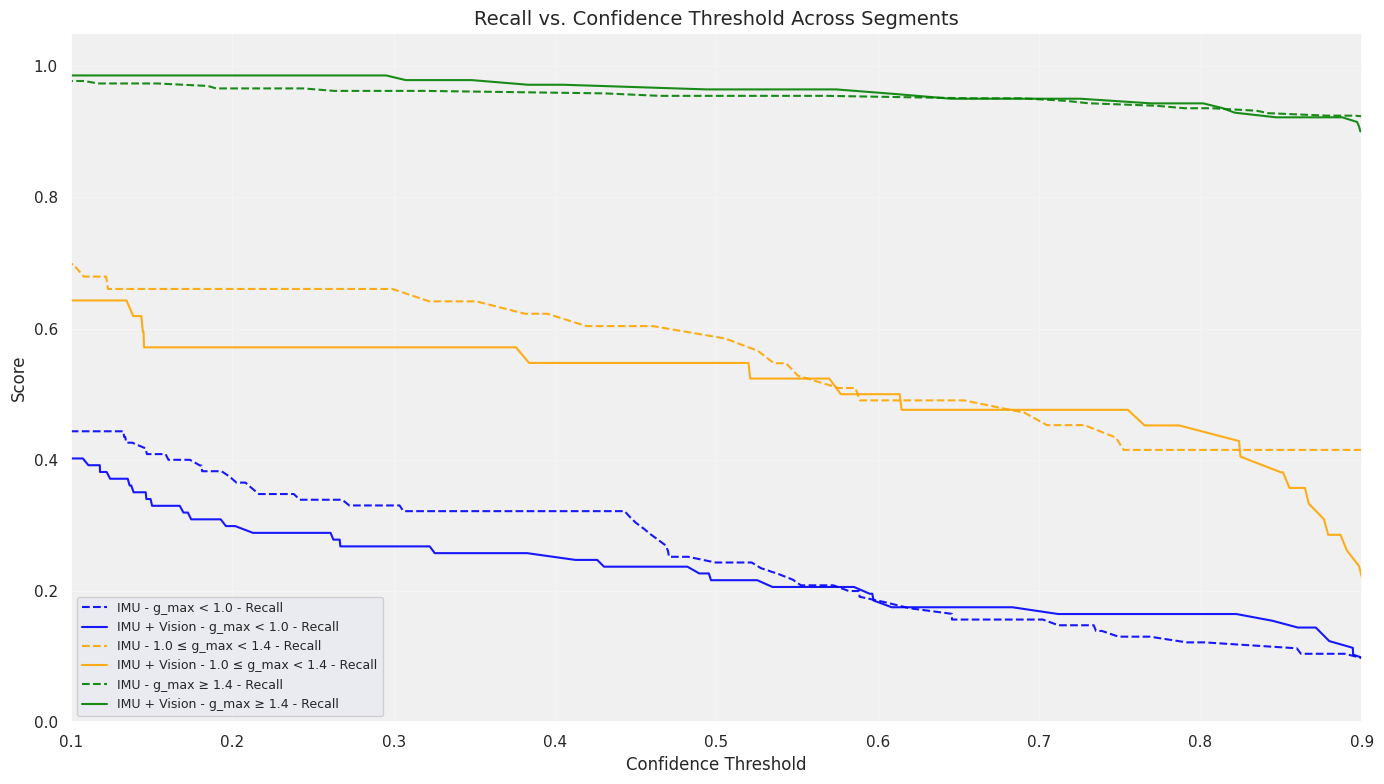

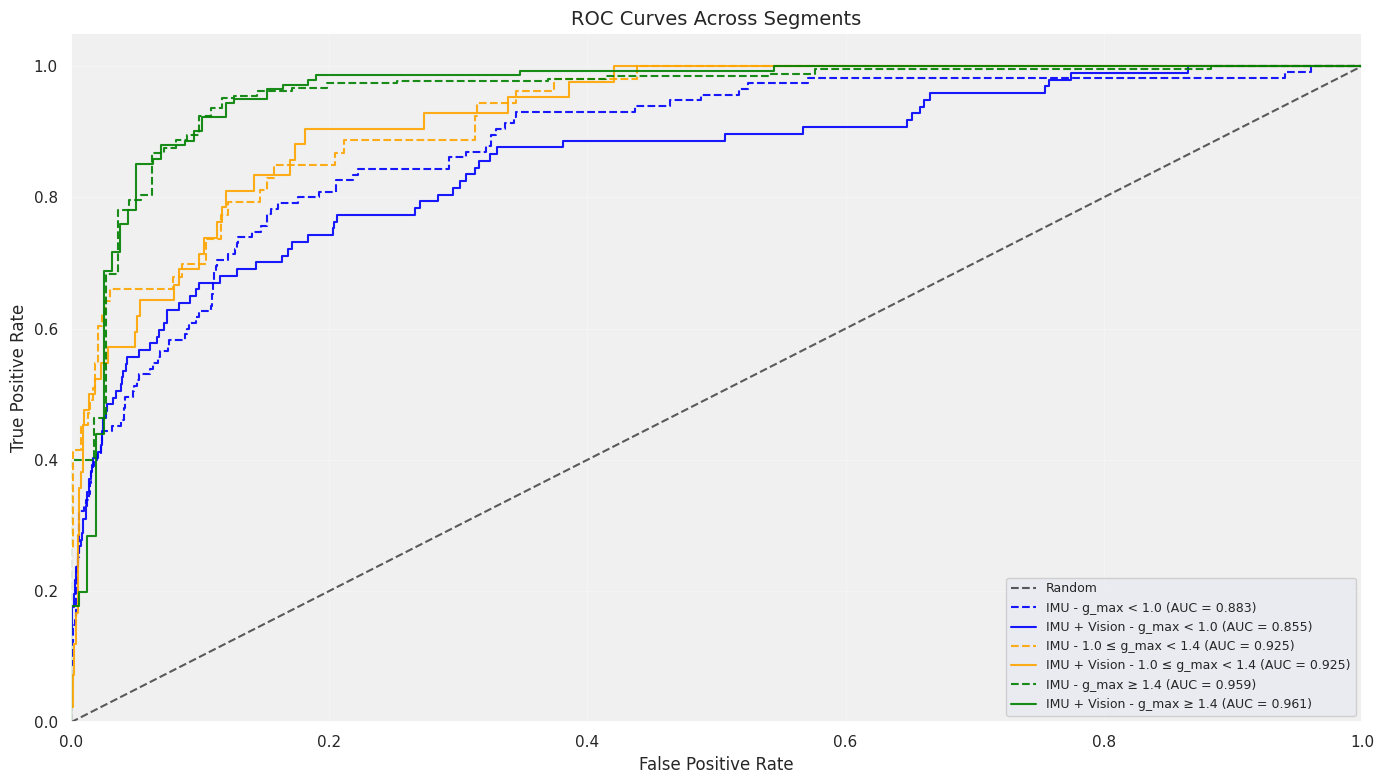

In [99]:
all_data = {
    "IMU": data_points_imu,
    "IMU + Vision": data_points_imu_vision
}

# Plot metrics
fig, axes = plot_metrics(all_data, output_filename="metrics_comparison.png")
plt.show()